In [1]:
# Fill in your name using the format below and student ID number
your_name = "Venne, Jaime"
student_id = "1372602"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
# %tensorflow_version 2.x

import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[]

In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
# import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tf.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Jaime, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
# base_dir = '/content/drive/My Drive/a' # For Google Colab 
from pathlib import Path
# Path("source_data/text_files/")
base_dir = 'C:/Users/jaime/Documents/assignment 3 WIRDM'

In [8]:
#Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# # drive.flush_and_unmount()

# Assignment 3

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

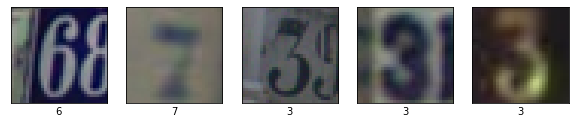

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [14]:
print(oml.config.cache_directory)

C:\Users\jaime\.openml\cache


In [15]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json 

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
    pass

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    
    return model



# def load_model_from_file(base_dir, name, extension='.h5'):
#     try:      
#         # if a json description is available, load config and then weights
#         if os.path.isfile(os.path.join(base_dir, name+'.json')):
#             json_file = open(os.path.join(base_dir, name+'.json'), 'r')
#             loaded_model_json = json_file.read()
#             json_file.close()
#             model = model_from_json(loaded_model_json)
#             model.load_weights(os.path.join(base_dir, name+extension))
#         else:
#             model = load_model(os.path.join(base_dir, name+extension))
#     except OSError:
#         shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
#         return False
#     return model

# def save_model_to_file(model, base_dir, name, extension='.h5'):
#     path = os.path.join(base_dir, name+extension)
#     model.save(path)
#     size = os.path.getsize(path)
#     # If model > 100MB, store the weights and architecture only.
#     if size > 100*1024*1024:
#         print("Model larger than 100MB, storing weights only.")
#         model.save_weights(path)
#         model_json = model.to_json()
#         with open(os.path.join(base_dir, name+".json"), "w") as json_file:
#             json_file.write(model_json)

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)       
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
#     else: # Load from file
#         shout("Loading model from file", verbose)
#         model = load_model_from_file(base_dir, name)
#         if not model:
#             shout("Model not found")
#         return
#         learning_curves = None
#         try:
#             learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
#         except FileNotFoundError:
#             shout("Learning curves not found")
#         return
#         shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

In [16]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

# def build_toy_model():
#     model = models.Sequential()
#     hidden_size = 10
#     model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
#     model.add(layers.Dense(hidden_size, activation='relu'))
#     model.add(layers.Dense(hidden_size, activation='softmax'))
#     model.compile(optimizer='rmsprop',
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
    
#     return model

# # First build and store
# run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
#                train=True, epochs=3, batch_size=32)

In [17]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
# run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
#                train=False)

In [18]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [19]:
#IMPORTS
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
# from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
import cv2
from tensorflow.keras import backend as K
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder, PowerTransformer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 120)               368760    
_________________________________________________________________
dense_25 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_26 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                310       
Total params: 378,160
Trainable params: 378,160
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.655049  0.241801  0.6

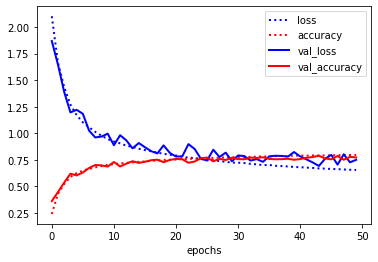

In [20]:
def build_model_1_1():
    hidden_size = 120
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(hidden_size, activation='relu'))
    model.add(layers.Dense(int(hidden_size/2), activation='sigmoid'))
    model.add(layers.Dense(int(hidden_size/4), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def build_model_1_1_gs(param_grid):
    def create_model(hidden_size, a1, a2, a3, lr):
        model = models.Sequential()
        model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
        model.add(layers.Dense(hidden_size, activation=a1))
        model.add(layers.Dense(int(hidden_size/2), activation=a2))
        model.add(layers.Dense(int(hidden_size/4), activation=a3))
        model.add(layers.Dense(10, activation='softmax'))
        model.compile(optimizer=optimizers.RMSprop(learning_rate=lr), loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model
    
    clf = KerasClassifier(create_model)

    grid = GridSearchCV(clf, param_grid=param_grid, cv=3, return_train_score=True, n_jobs=-1)
    grid.fit(X_train, y_train)

    return grid

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=50, batch_size=64)
answer_q_1_1 = """
To save computation time (running on processor) I fixed it to 3 hidden layers of size x, x/2, x/4 and used increasingly local grid 
searches over the parameters: (batch size, epochs, x, activation, optimizer, learning rate) to obtain this 
design. The book by the creator of Keras states that RMSprop works well on most problems. The softmax 
with the loss is good for multi-classification. Slight overfitting is observed.
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to greyscale. You can use the helper function below. If you want to do additional preprocessing, you can do that here, too.

Store the preprocessed data as a tuple preprocessed_split
Rerun and re-evaluate your model using the preprocessed data.
For the remainder of the assignment, always use the preprocessed data
Explain what you did and interpret the results in 'answer_q_1_2'. Is the model better, if so, why?

In [21]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               123000    
_________________________________________________________________
dense_15 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                310       
Total params: 132,400
Trainable params: 132,400
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.338254  0.556811  0.5

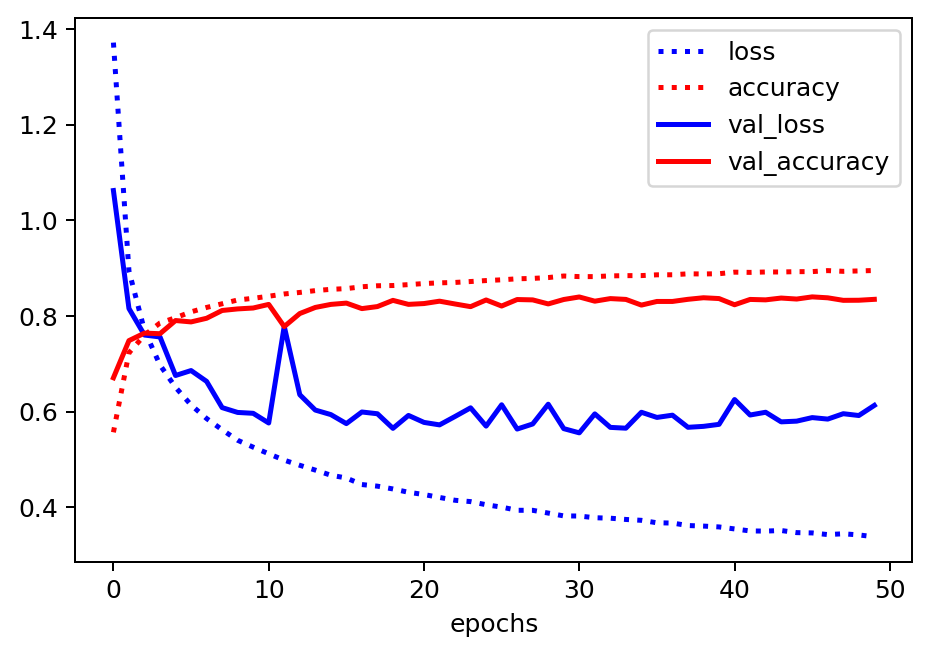

In [38]:
Xr_gray = rgb2gray(Xr)
Xr_flattened = np.array([np.asarray(Xr_gray[i, :, :, :]).reshape(-1) for i in range(Xr_gray.shape[0])])
Xr_transformed = np.array([Xr_flattened[i, :].reshape(32, 32, 1) for i in range(Xr_gray.shape[0])])
X_train_all_t, X_test_t, y_train_all_t, y_test_t = train_test_split(Xr_transformed,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train_transformed, X_val_transformed, y_train_t, y_val_t = train_test_split(X_train_all_t,y_train_all_t, stratify=y_train_all_t, train_size=0.8, random_state=1)

# # # Replace with the preprocessed data
preprocessed_split = X_train_transformed, X_val_transformed, y_train, y_val

# preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
    hidden_size = 120
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32, 32, 1)))
    model.add(layers.Dense(hidden_size, activation='relu'))
    model.add(layers.Dense(int(hidden_size/2), activation='sigmoid'))
    model.add(layers.Dense(int(hidden_size/4), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=64)
answer_q_1_2 = """
               Converting to grayscale images has a positive effect as recognizing digits don't depend on color so the model may learn
               irrelevant color patterns. First, I applied PCA but this did not work with CNNs later because they assume locality. I
               applied PCA later in 4.2 to study its effects. We observe more overfitting in the model. 
               than before so regularization is necessary. 
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout_62 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               123000    
_________________________________________________________________
dense_22 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_23 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_24 (Dense)    

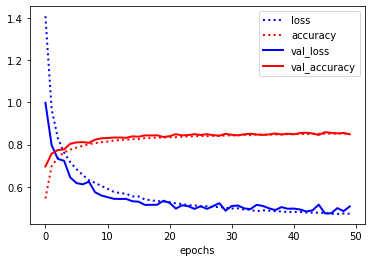

In [23]:
def build_model_1_3():
    hidden_size = 120
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32, 32,1,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.08))
    model.add(layers.Dense(hidden_size, activation='relu'))
    model.add(layers.Dense(int(hidden_size/2), activation='sigmoid'))
    model.add(layers.Dense(int(hidden_size/4), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=64)
answer_q_1_3 = """
               In the previous model quite some overfitting can be observed. Therefore, I am aim to obtain a similar performance for the test and validation
               data. There exist multiple ways to obtain the same/better results (as there are infinite), though this model regularizes the previous
               model such that the performance of the train and validation set are similar. In addition, the accuracy slightly improved.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

##### Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

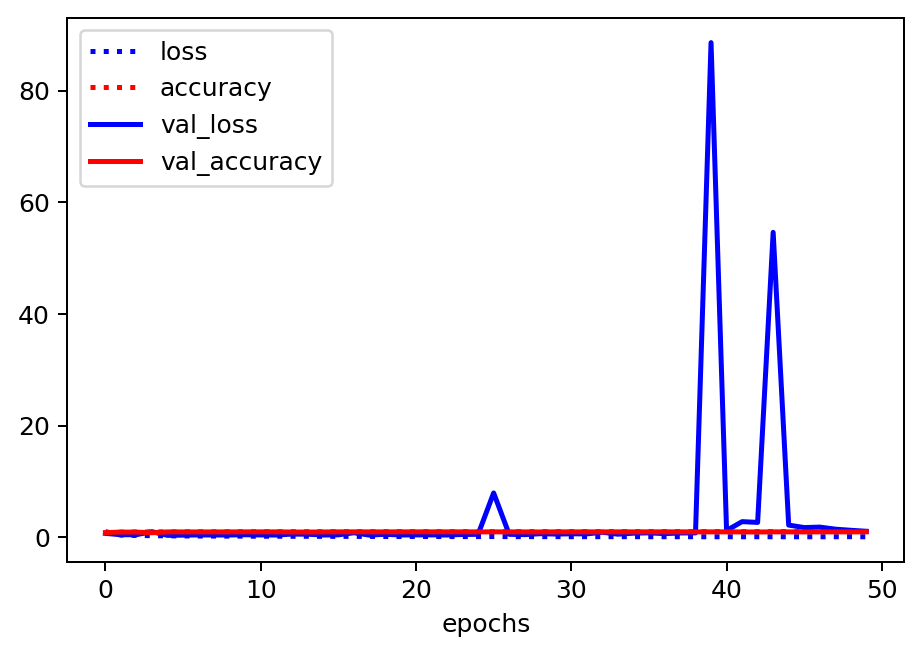

In [37]:
def build_model_2_1():
    N = 2
    M = 5
    K = 1

    layer_sizes = [32, 64, 128, 256, 512, 1024]
    
    model = models.Sequential()
    for i in range(0, M):
        for j in range(0, N):
            if i == 0 and j == 0:
                model.add(layers.Conv2D(layer_sizes[i] , kernel_size=(3,3), padding="same",activation='relu',input_shape=(32, 32, 1)))
            else:
                model.add(layers.Conv2D(layer_sizes[i], kernel_size=(3,3),padding="same", activation='relu'))
        model.add(layers.BatchNormalization())
        
        model.add(layers.Dropout(0.2)) 
        model.add(layers.MaxPooling2D((2, 2)))
 
    model.add(layers.Flatten())
    
    for i in range(0, K):
        model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    model.summary()
    return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=64)
answer_q_2_1 = """
               I applied the structure: ((CONV -> RELU)*N -> POOL)*M -> (DENSE -> RELU)*K -> SOFTMAX with (M>=0, 0 <= N <= 3, 0 <= K <= 2. This structure
               is proposed in the book "Deep Learning for Computer Vision" by A. Rosebrock Ch. 11. This is a common structure that is shown
               to work for many problems. It is repeated until the width and height are very small which can be seen in the model summary. The book states 
               that adding dropout layers within the range of (.1, .25) after each Conv layer may work better than putting one after the flatten layer, 
               which is the case here. I applied zero padding as I see no reason to apply dimension reduction by Conv layer here. Some overfitting can be 
               observed.
               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

# Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)       

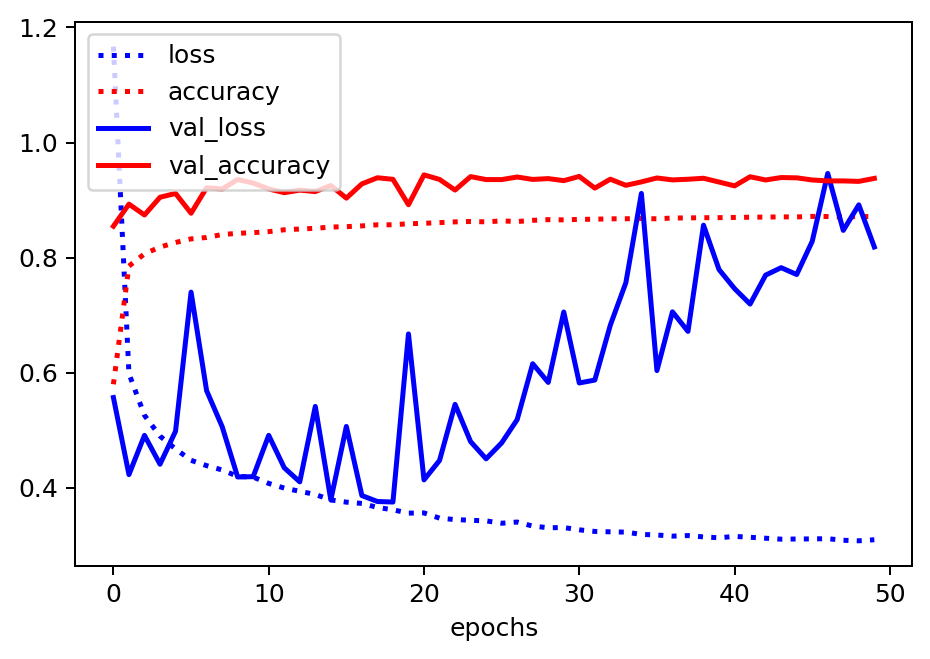

In [39]:
import os

#PARAMETERS
par_generate = False #Generate or load dataset
par_augmented_per_image = 9 #the number of images that are created for each image
desired_amount = np.average(sum(y_train_t)) #how many samples each class should have

labels = {1: 0, 2: 1,3: 2, 4: 3,5: 4, 6: 5, 7: 6, 8:7, 9: 8, 0: 9}

gen = ImageDataGenerator(rotation_range=0.10, width_shift_range=0.1, shear_range=0.08)

def add_augmented_images(X_aug, y_aug, label, desired_total, number_of_augmented_images):
    
    #this function creates augmented images for a certain amount of a specified class/label
    i = 0
    while sum(y_aug)[label] < desired_total:
        current_label = int(np.argmax(y_train_aug, axis=1)[i])
        if current_label == label:
            image = np.expand_dims(X_train_transformed[i], 0) #* 255
            aug_iter = gen.flow(image)
            aug_images = np.array([next(aug_iter)[0].astype(np.uint8) for i in range(number_of_augmented_images)])
            X_aug = np.vstack([X_aug, aug_images])
            y = np.zeros((number_of_augmented_images, 10))
            y[:, current_label] = 1
            y_aug = np.vstack([y_aug, y])
        i += 1
    return X_aug, y_aug

def delete_data(X_aug, y_aug, label, desired_total):
    #this function deletes data from a specified class (that is over represented)
    removed_amount = sum(y_aug)[label] - desired_total
    i = 0
    remove_rows = []
    while len(remove_rows) < removed_amount:
        current_label = int(np.argmax(y_train_aug, axis=1)[i])
        if current_label == label:
            remove_rows.append(i)
        i += 1

    X_aug = np.delete(X_aug, remove_rows, 0)
    y_aug = np.delete(y_aug, remove_rows, 0)
    return X_aug, y_aug

#either generate data or load a previously generated dataset
if par_generate:
    X_train_aug = X_train_transformed.copy()
    y_train_aug = y_train.copy()
    for i in range(0, 10): #for each label it is determined whether data should be added to removed
        print(X_train_aug.shape)
        y_total_train = sum(y_train_aug) 
        for j in labels:
            print(str(j) + " occurs: " + str(int(y_total_train[labels[j]])) + " times")
        if y_total_train[i] < desired_amount:
            X_train_aug, y_train_aug = add_augmented_images(X_train_aug, y_train_aug, i, desired_amount, par_augmented_per_image)
        else:
            X_train_aug, y_train_aug = delete_data(X_train_aug, y_train_aug, i, desired_amount)
        print("done with index: " + str(i))
    #shuffle the data so that we are not stuck with a whole sequence of the same label.
    X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug, random_state=1)
    #finally create the augmented split
    augmented_split = X_train_aug, X_val_transformed, y_train_aug, y_val_t
    np.save(os.path.join(base_dir, 'data_augmented_X.npy'), X_train_aug)
    np.save(os.path.join(base_dir, 'data_augmented_y.npy'), y_train_aug)
else:   
    path_X = (os.path.join(base_dir, 'data_augmented_X.npy'))
    path_y = (os.path.join(base_dir, 'data_augmented_y.npy'))

    np_load_old = np.load

    np.load = lambda *a,**k: np_load_old(*a,allow_pickle=True)
    X_train_aug = np.load(path_X)
    y_train_aug = np.load(path_y)

    np.load = np_load_old

    augmented_split = X_train_aug, X_val_transformed, y_train_aug, y_val_t 
    
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=True, epochs=50, batch_size=64)

answer_q_2_2 = """
I do it differently, as my experiments with data augmentation did not increase accuracy. I decided to augment 
data with the purpose of data balancing, because I noticed that digits e.g. 1 occur more often in the training data. 
Therefore, I let all labels occur equally and kept the same amount of data. We normally focus on accuracy but often 
the F1 score is more valuable as it won't have a bias towards majority classes. I get about the same accuracy but with underfitting.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

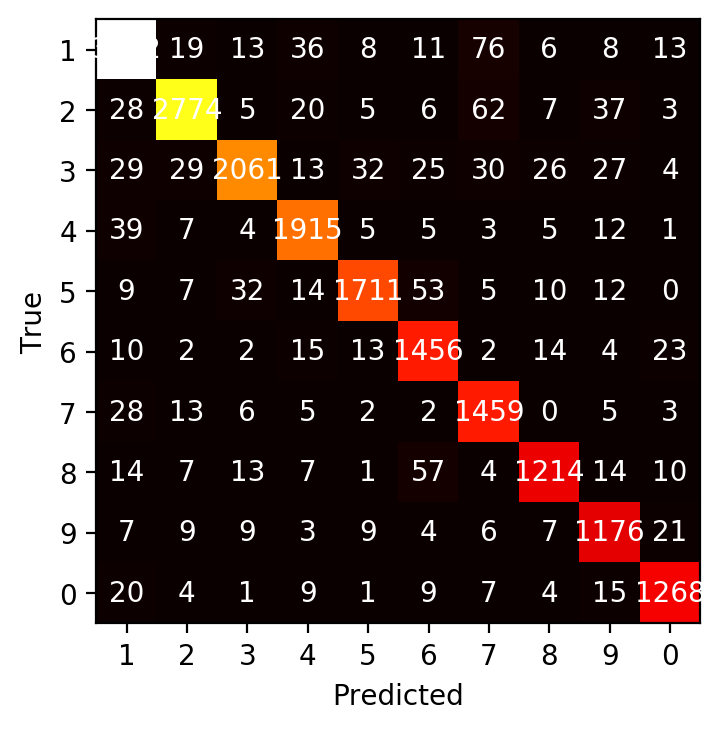

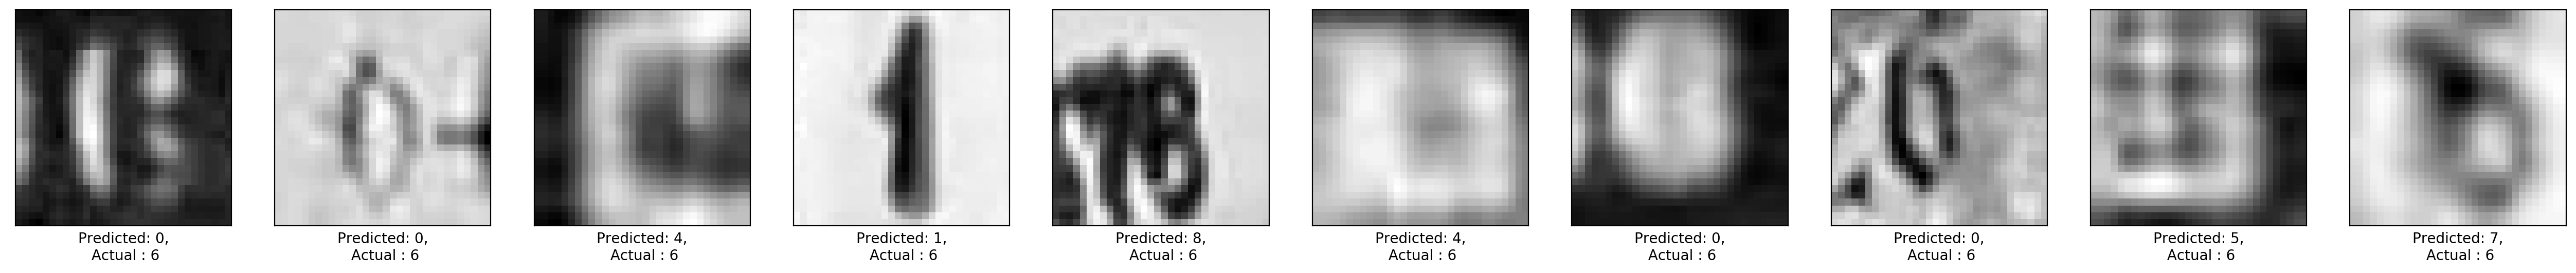

Answer is 692 characters long


In [26]:
def test():
    model = load_model_from_file(base_dir, "model_2_2", extension='.h5')
    score, acc = model.evaluate(X_test_t, y_test,
                              batch_size=64)
    print(acc)
    pass
  
test_accuracy_3_1 = 0.9384

def plot_confusion_matrix():
    labels = {1: 0, 2: 1,3: 2, 4: 3,5: 4, 6: 5, 7: 6, 8:7, 9: 8, 0: 9}
    plt.rcParams['figure.dpi'] = 200
    model = load_model_from_file(base_dir, "model_2_2", extension='.h5')
    y_pred = model.predict(X_test_t)

    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap='hot')
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    for i in range(100):
        ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
    pass

def plot_misclassifications():
    model = load_model_from_file(base_dir, "model_2_2", extension='.h5')
    y_pred = model.predict(X_test_t)
    labels = {1: 0, 2: 1,3: 2, 4: 3,5: 4, 6: 5, 7: 6, 8:7, 9: 8, 0: 9}

    y_pred_specific = np.argmax(y_pred, axis=1) + 1
    y_test_specific = np.argmax(y_test, axis=1) + 1
    for i in range(0, y_pred_specific.shape[0]):
        if y_pred_specific[i] == 10:
            y_pred_specific[i] = 0
        if y_test_specific[i] == 10:
            y_test_specific[i] = 0

    misclassified = []
    for i in range(0, len(y_test)):
        if int(y_test_specific[i]) != int(y_pred_specific[i]) and y_test_specific[i] == 6:
            misclassified.append(i)

    fig, axes = plt.subplots(1, 10,  figsize=(32, 32))
    nr = 0
    for i in misclassified[:10]:
        axes[nr].imshow(X_test_t[i,:,:,0], cmap='gray')
        axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (y_pred_specific[i], y_test_specific[i]))
        axes[nr].set_xticks(()), axes[nr].set_yticks(())
        nr += 1
  
    plt.show();
    pass
  
plot_confusion_matrix()
plot_misclassifications()

answer_q_3_1 = """
The accuracy on the test data is 93.8%. The confusion matrix indeed predicts the 1 way less often than with model 2_1. Therefore,
the data balancing definitely has an effect on potential biases towards certain classes. The most frequent mistakes are digits 
that resemble each other e.g. (6 and 8) and (2, 7) or the (this makes sense). I plotted the misclassified images for the 6. Looking at these images I 
am convinced that I am not better than the model at predicting. These are all very vague and/or have multiple digits in the image, implying
that the model could focus on either digit. Finally, the font is also relevant and e.g. the 2 and 7 may look very similar in different fonts.
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_34 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 64)       

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


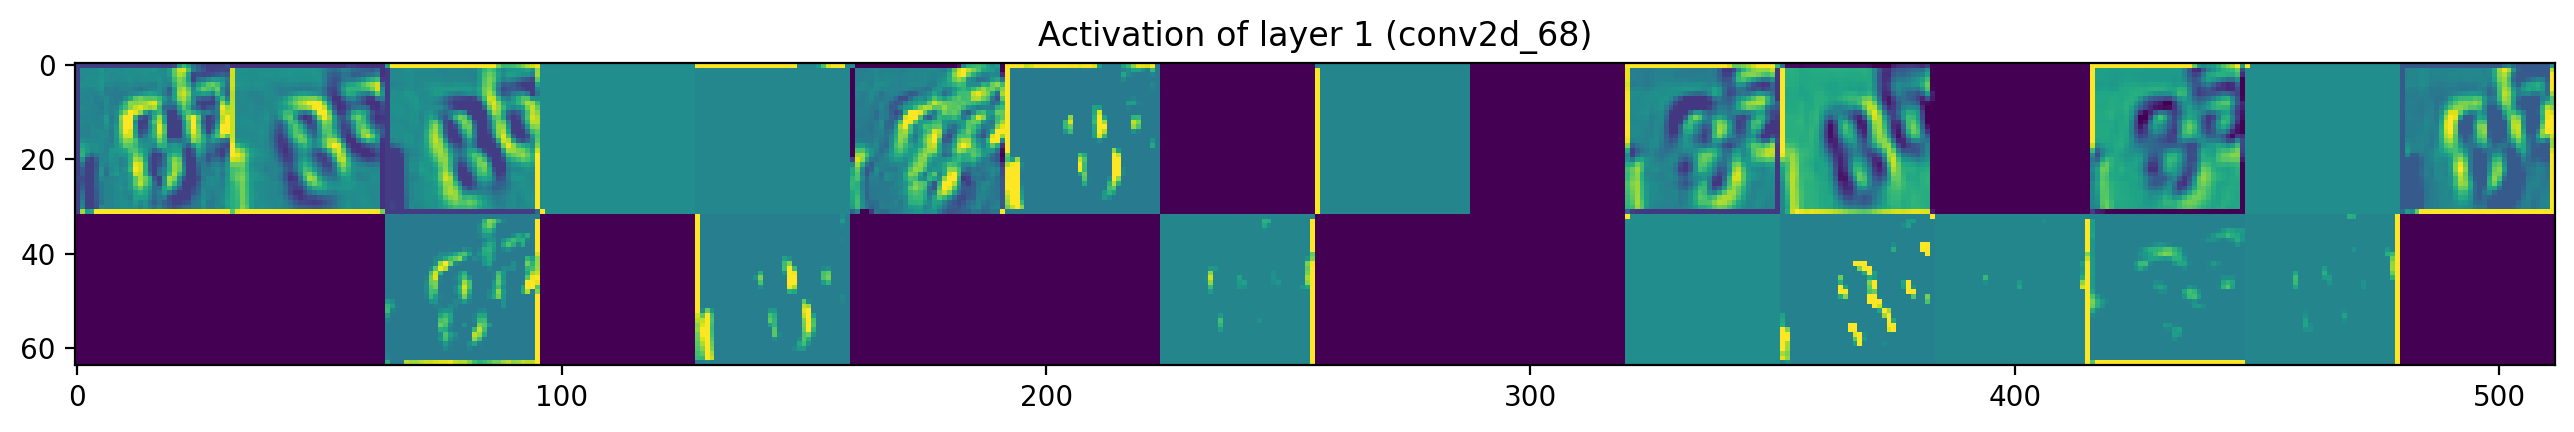

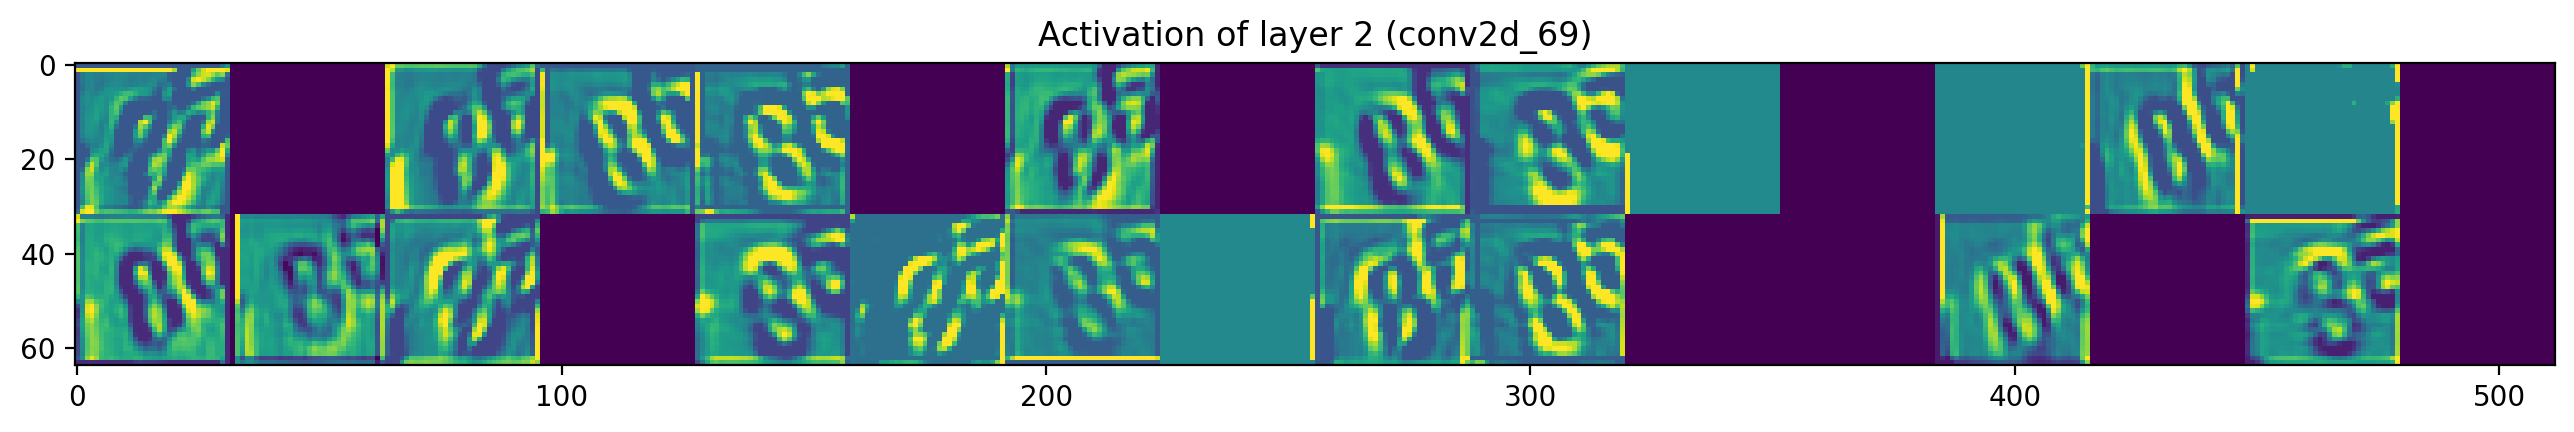

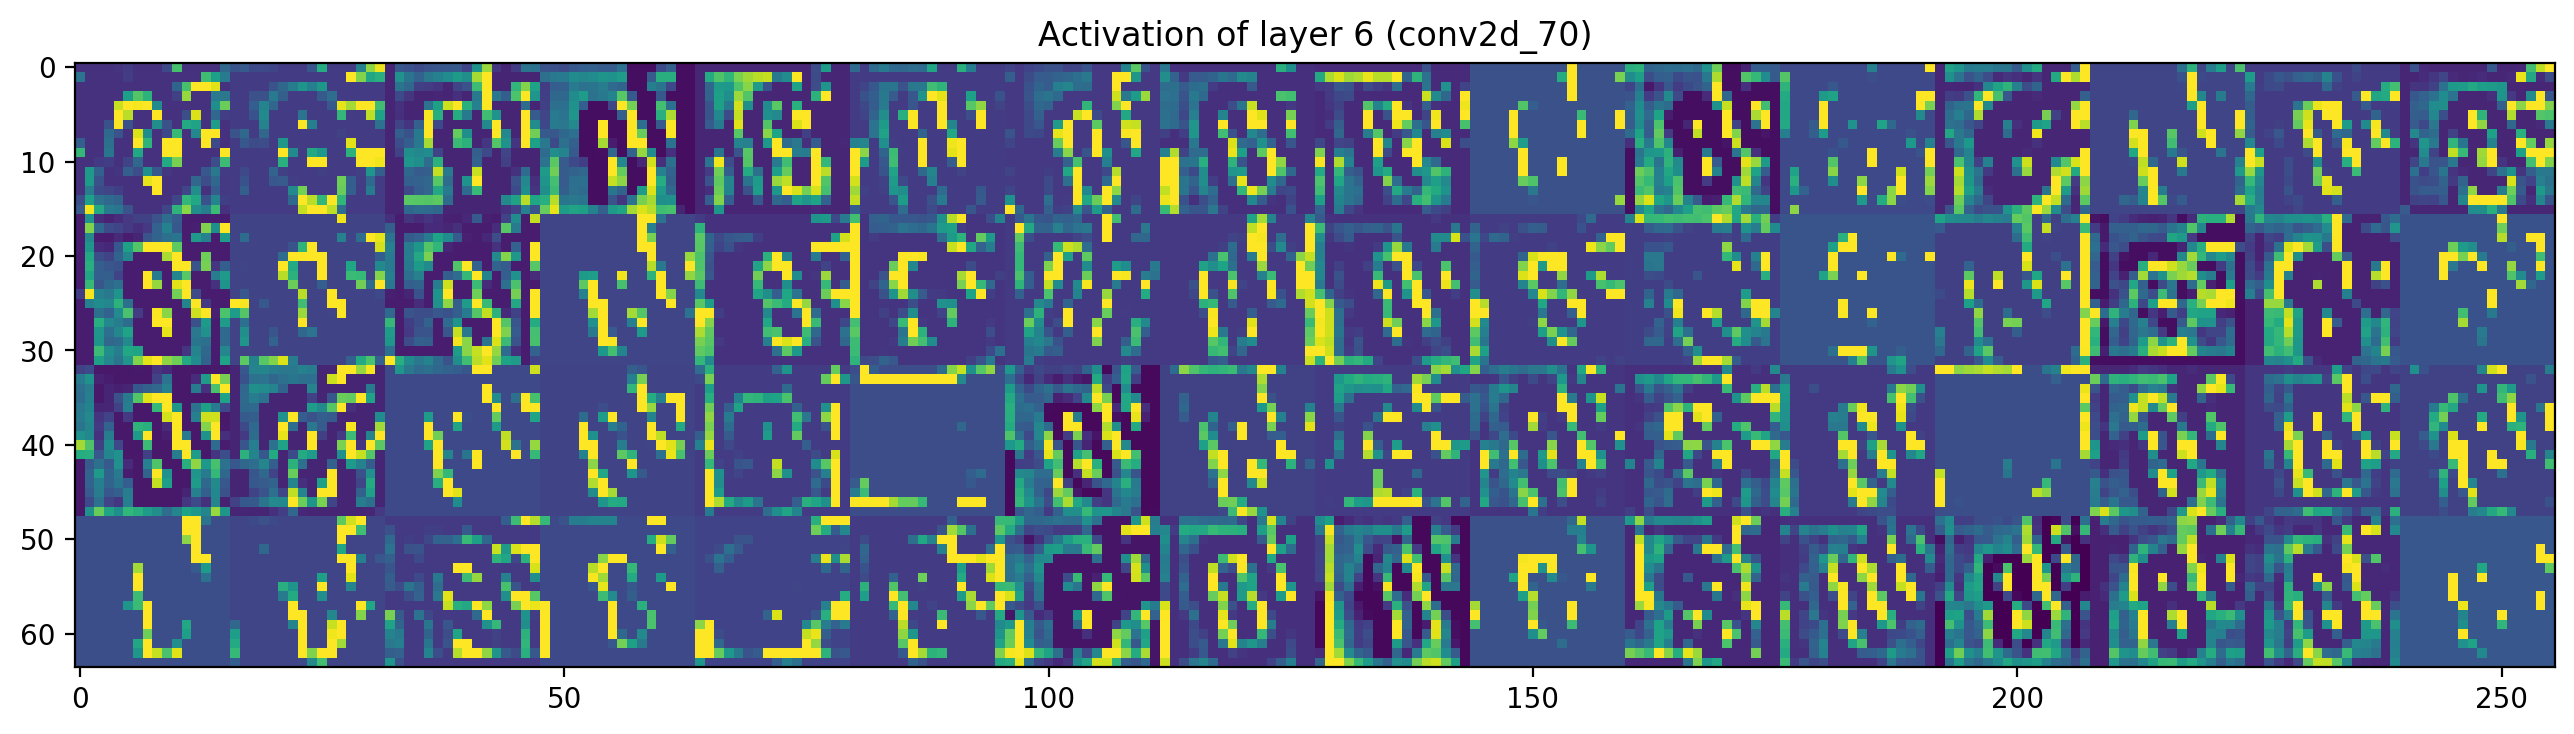

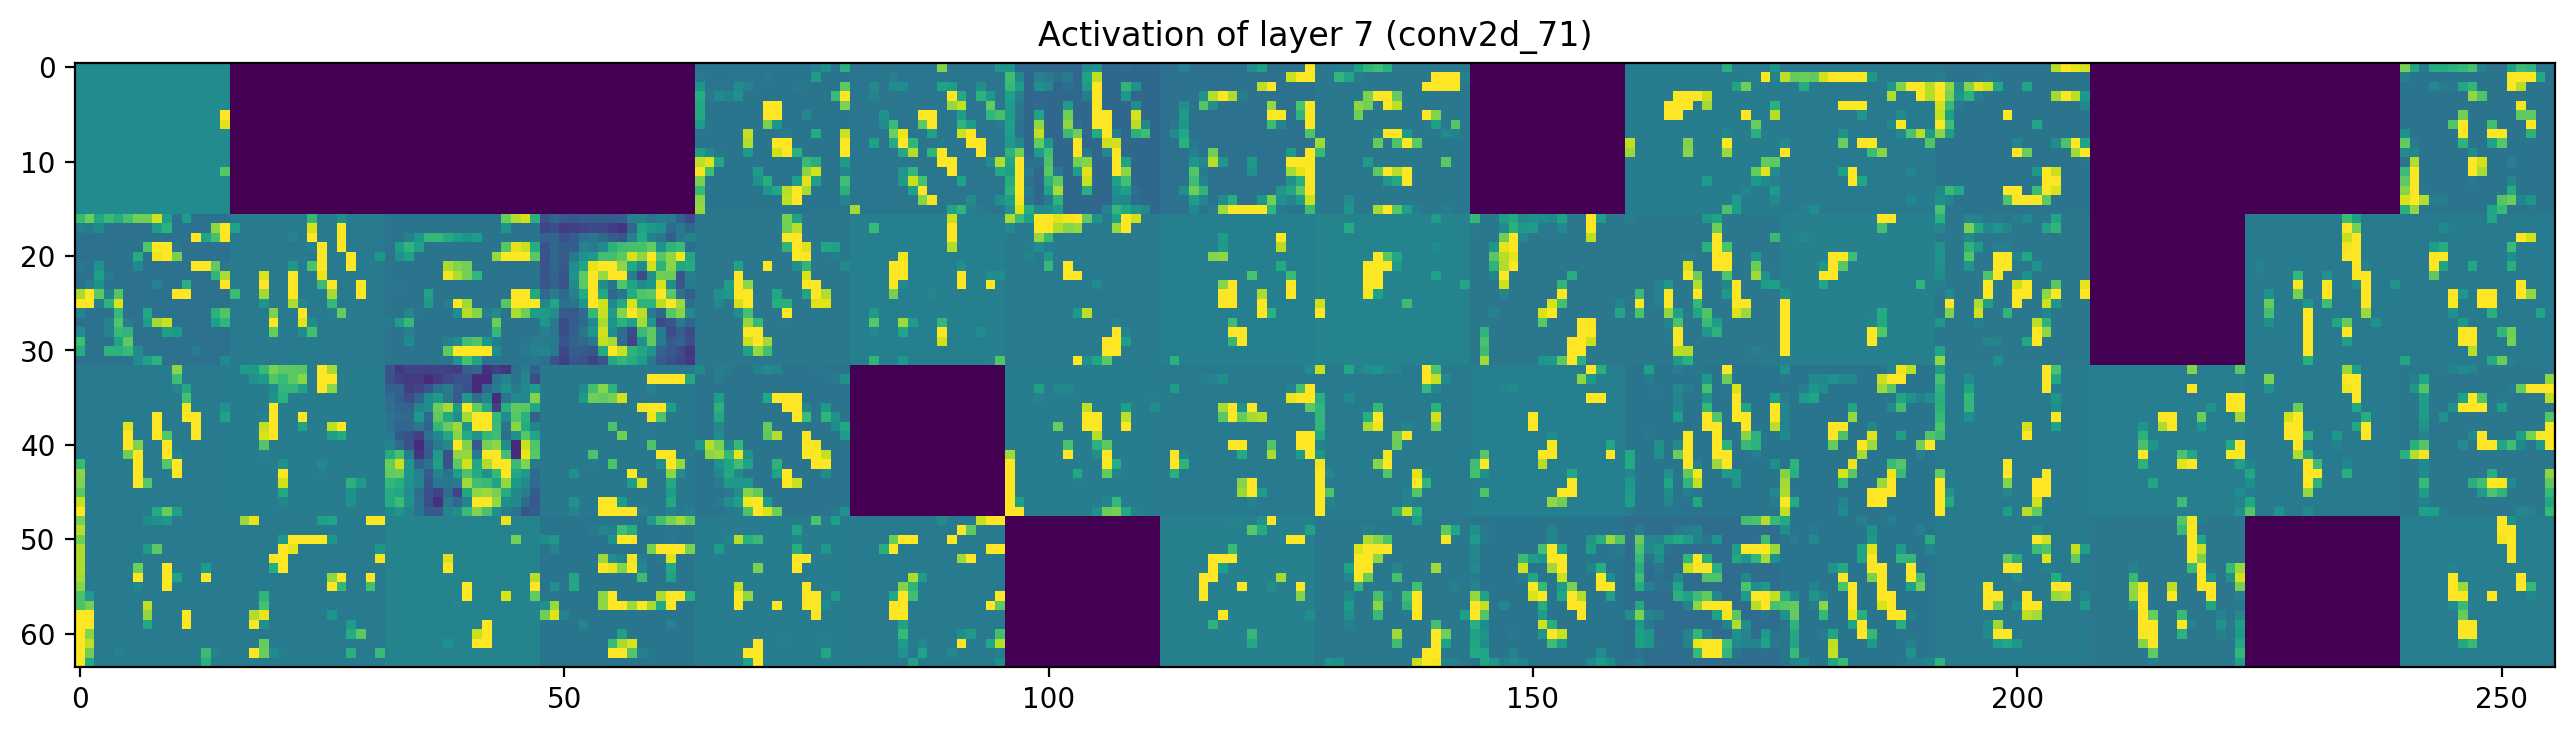

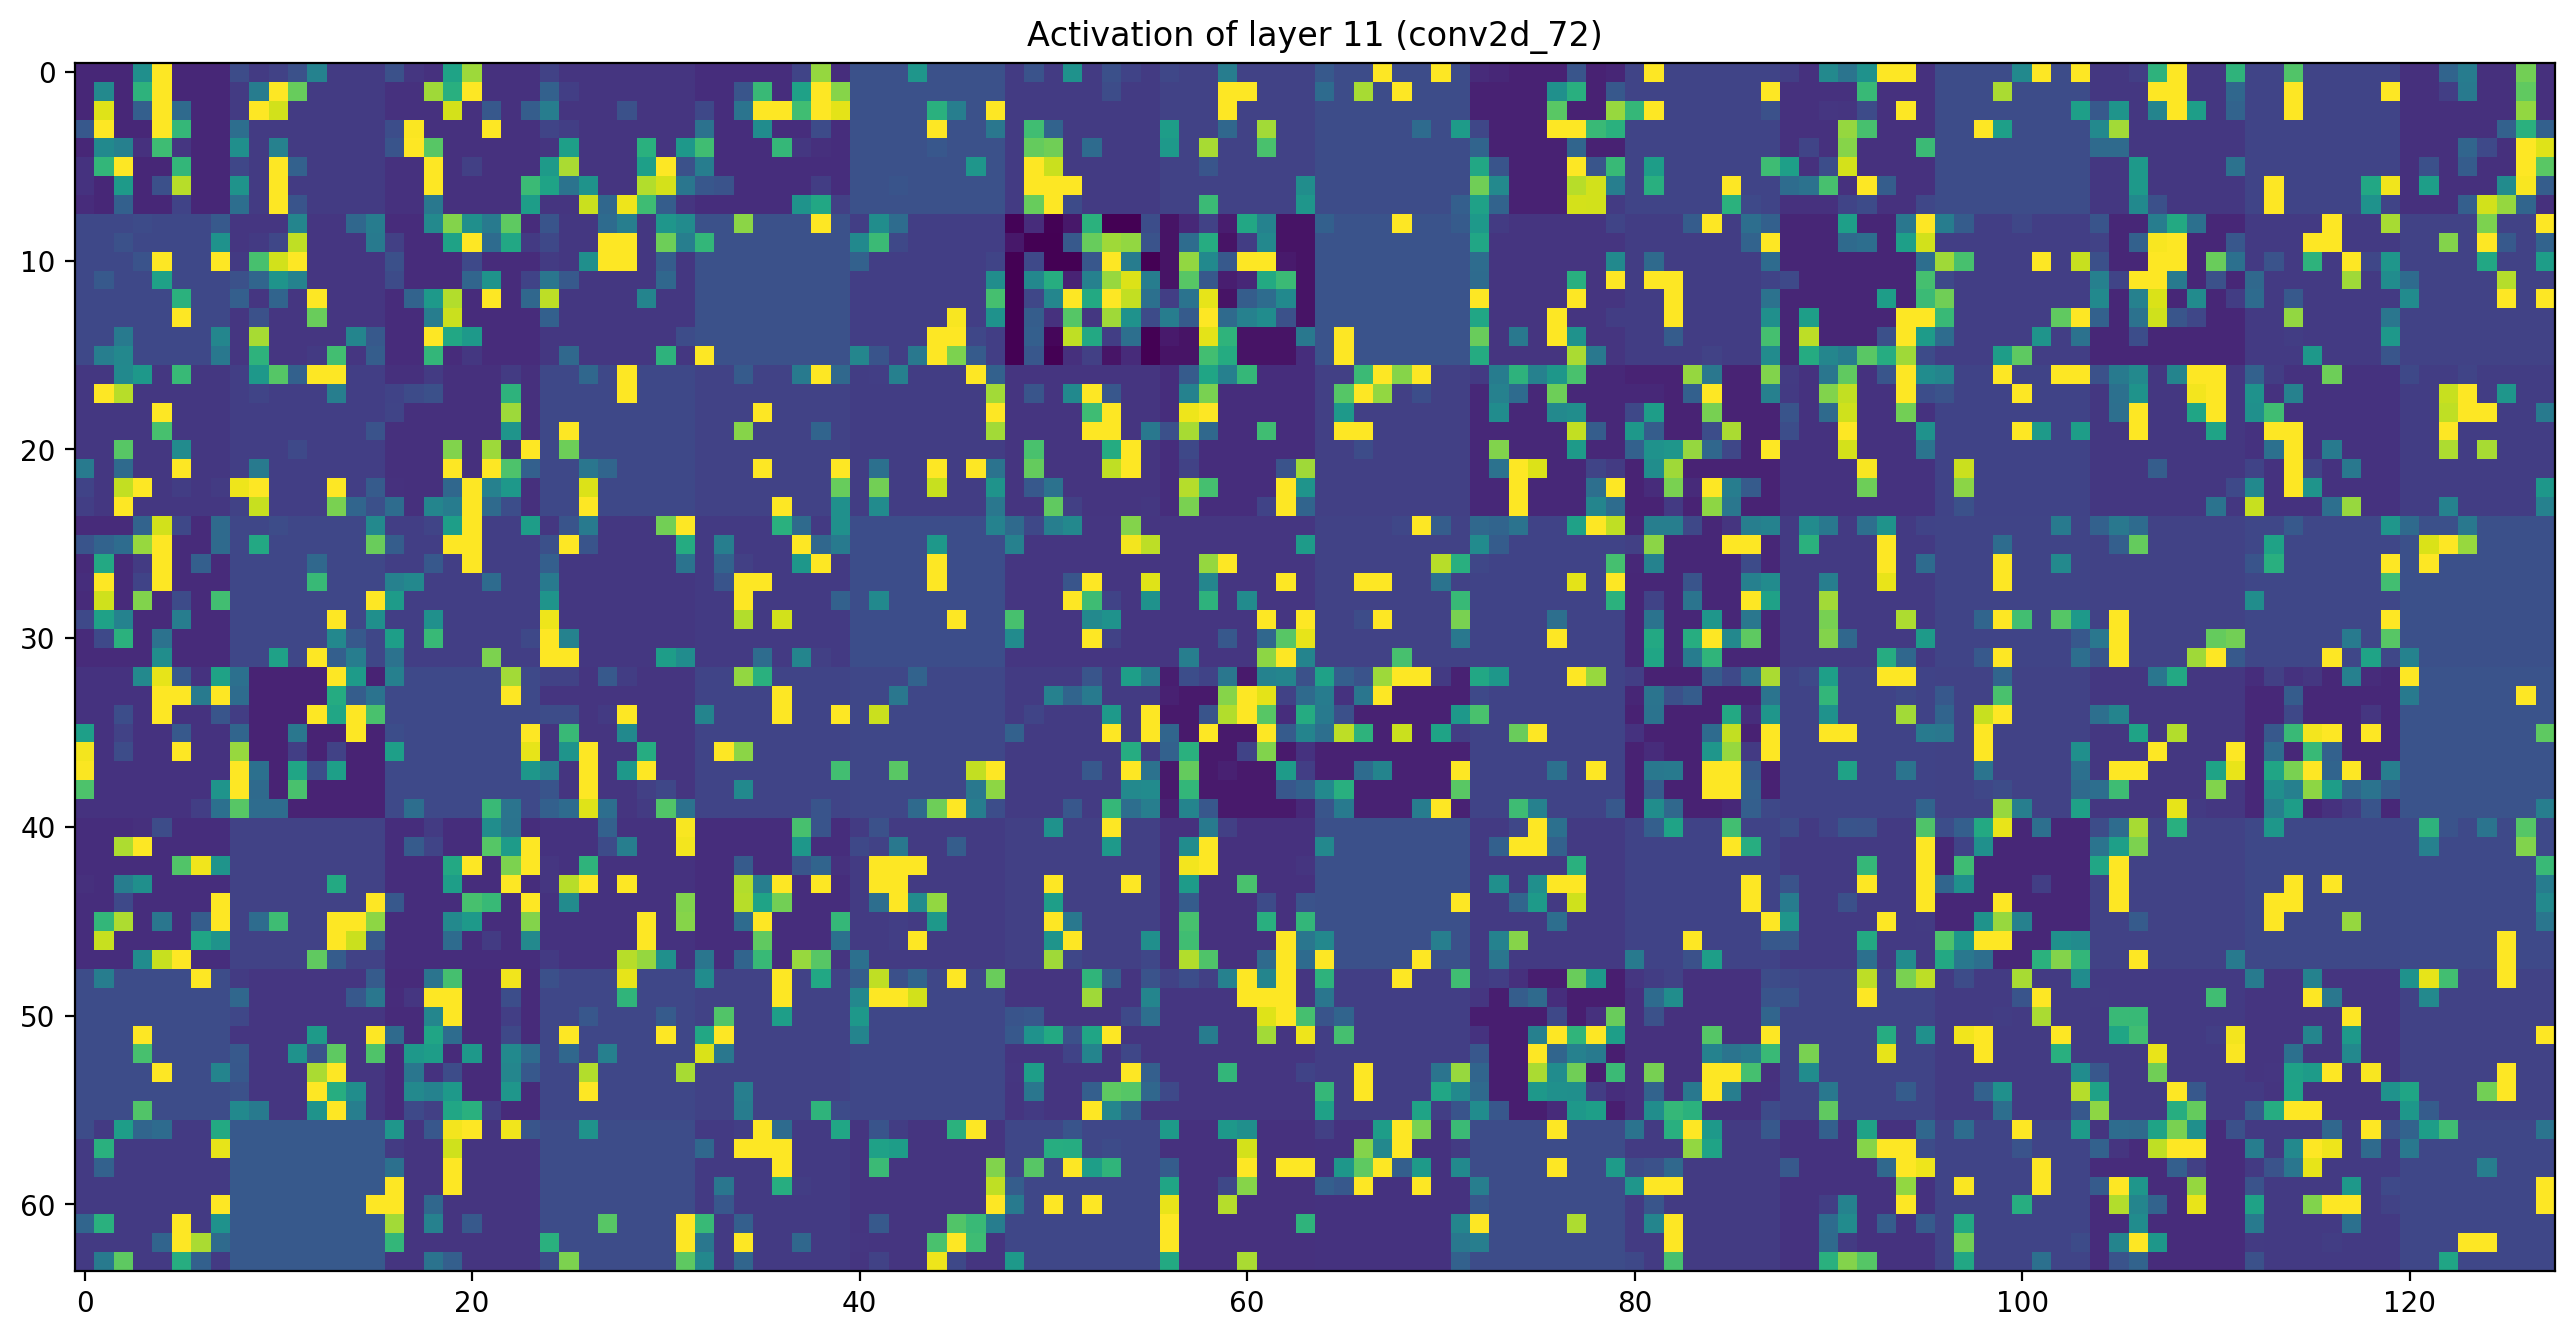

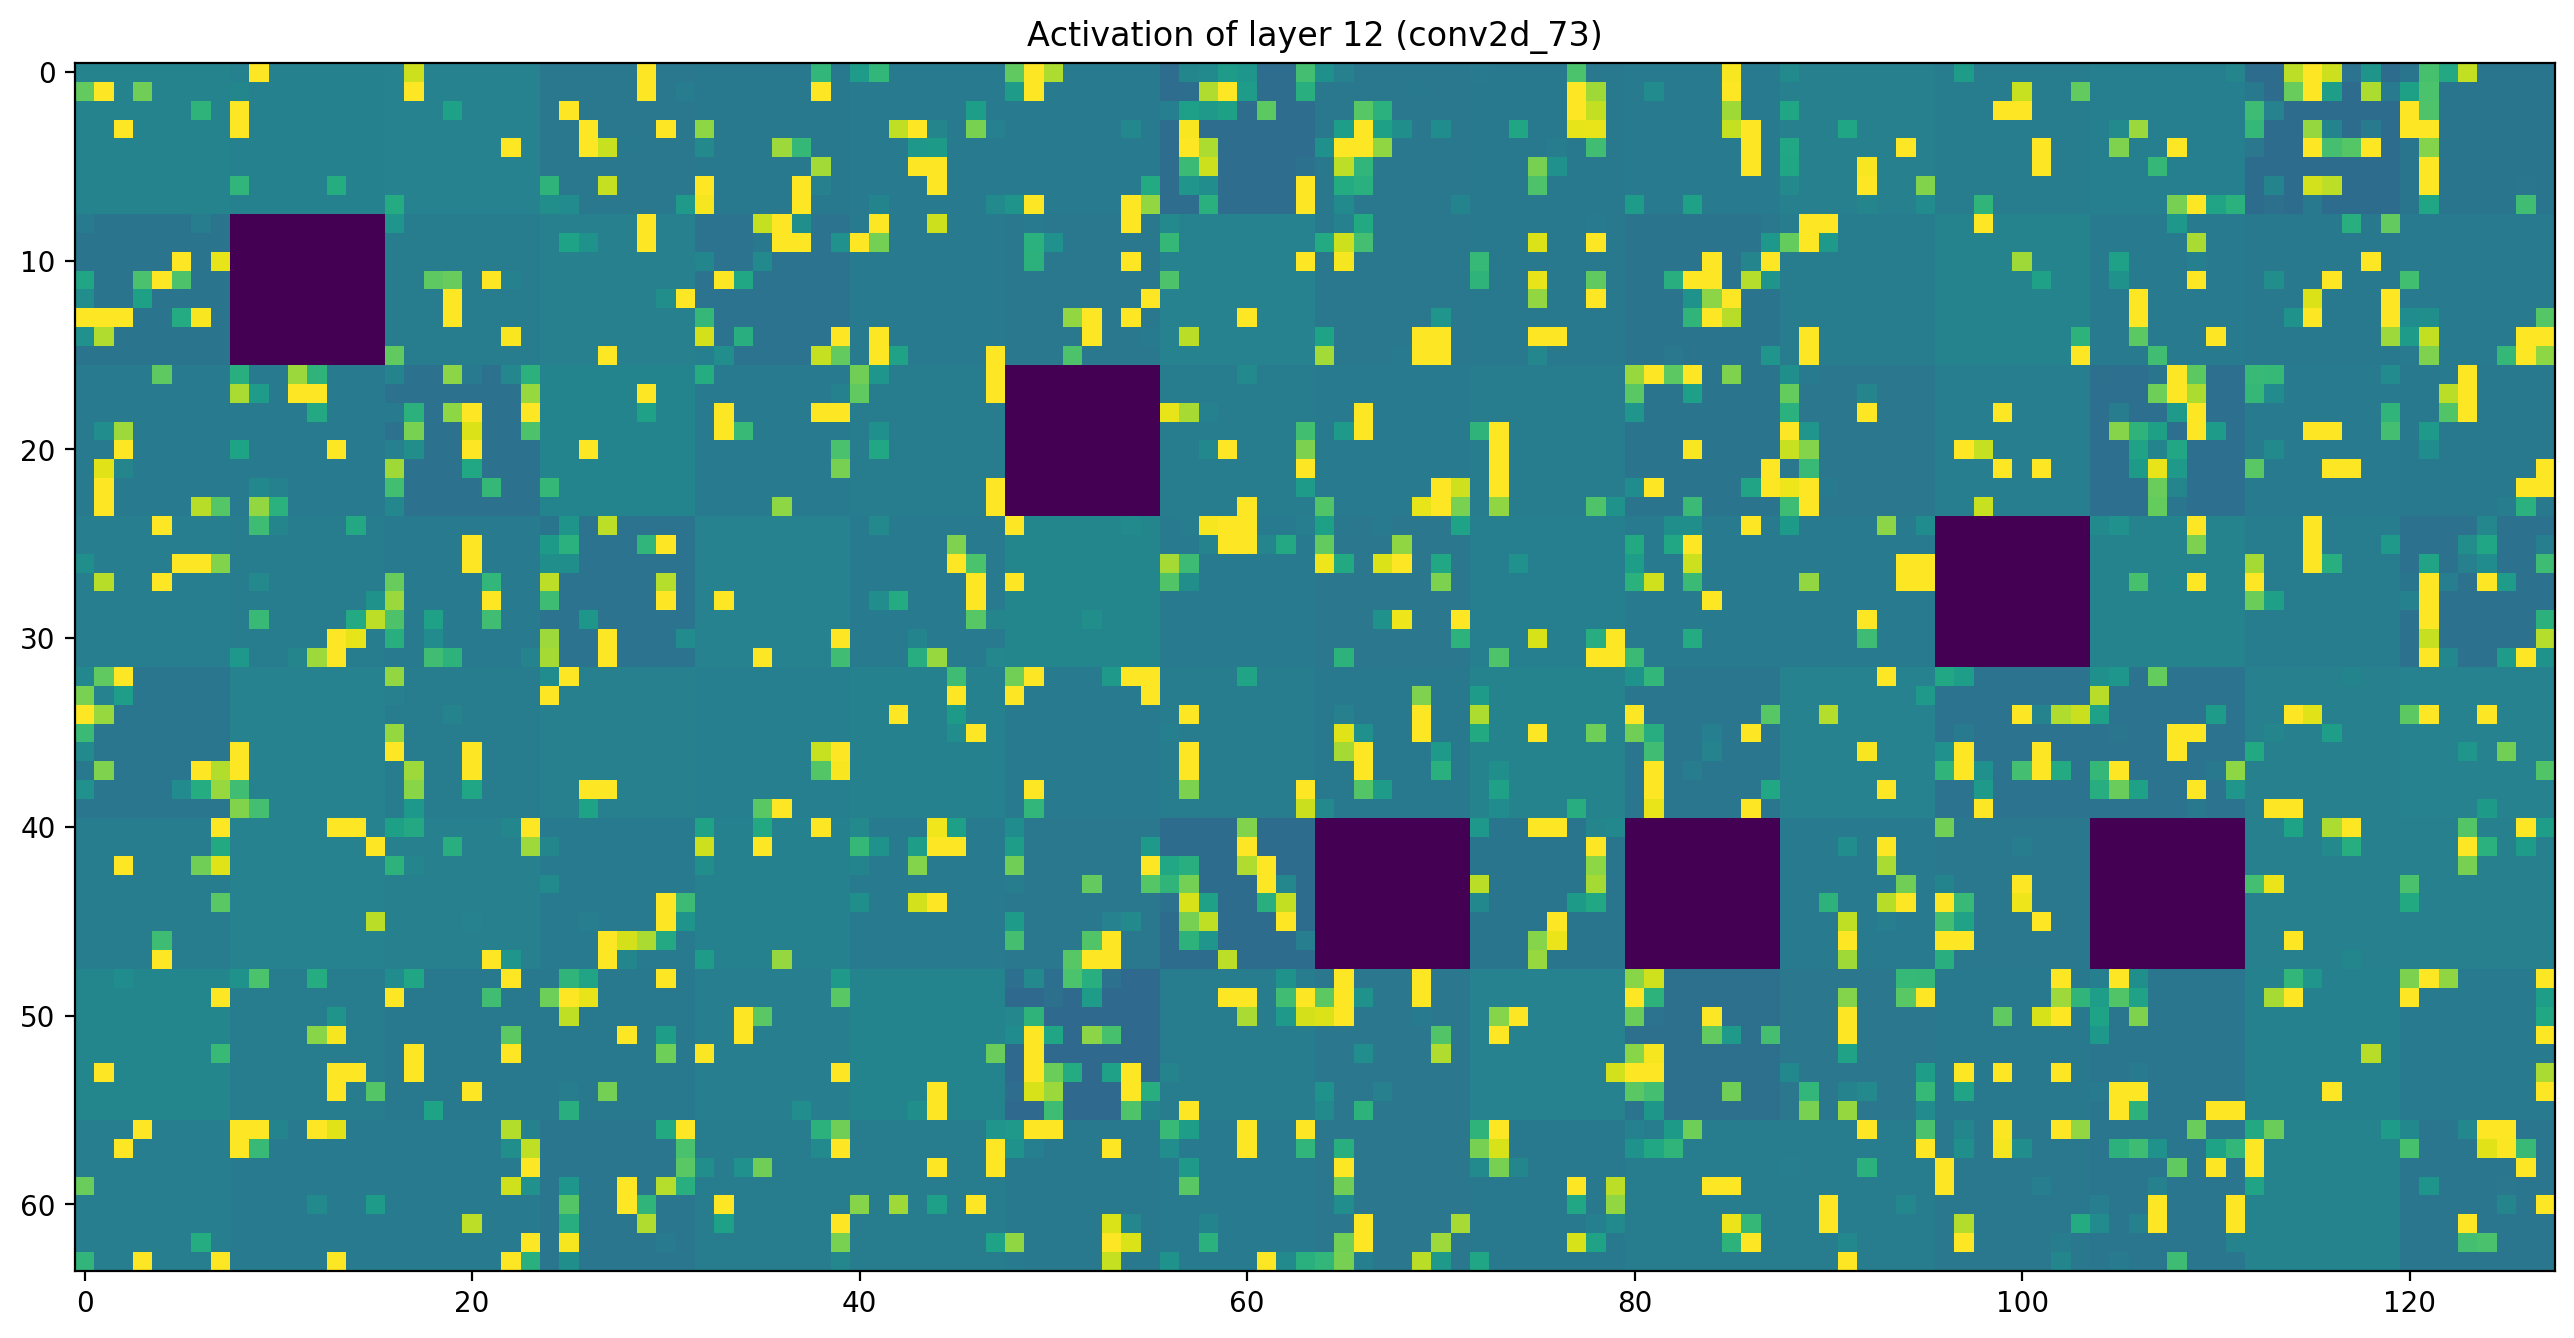

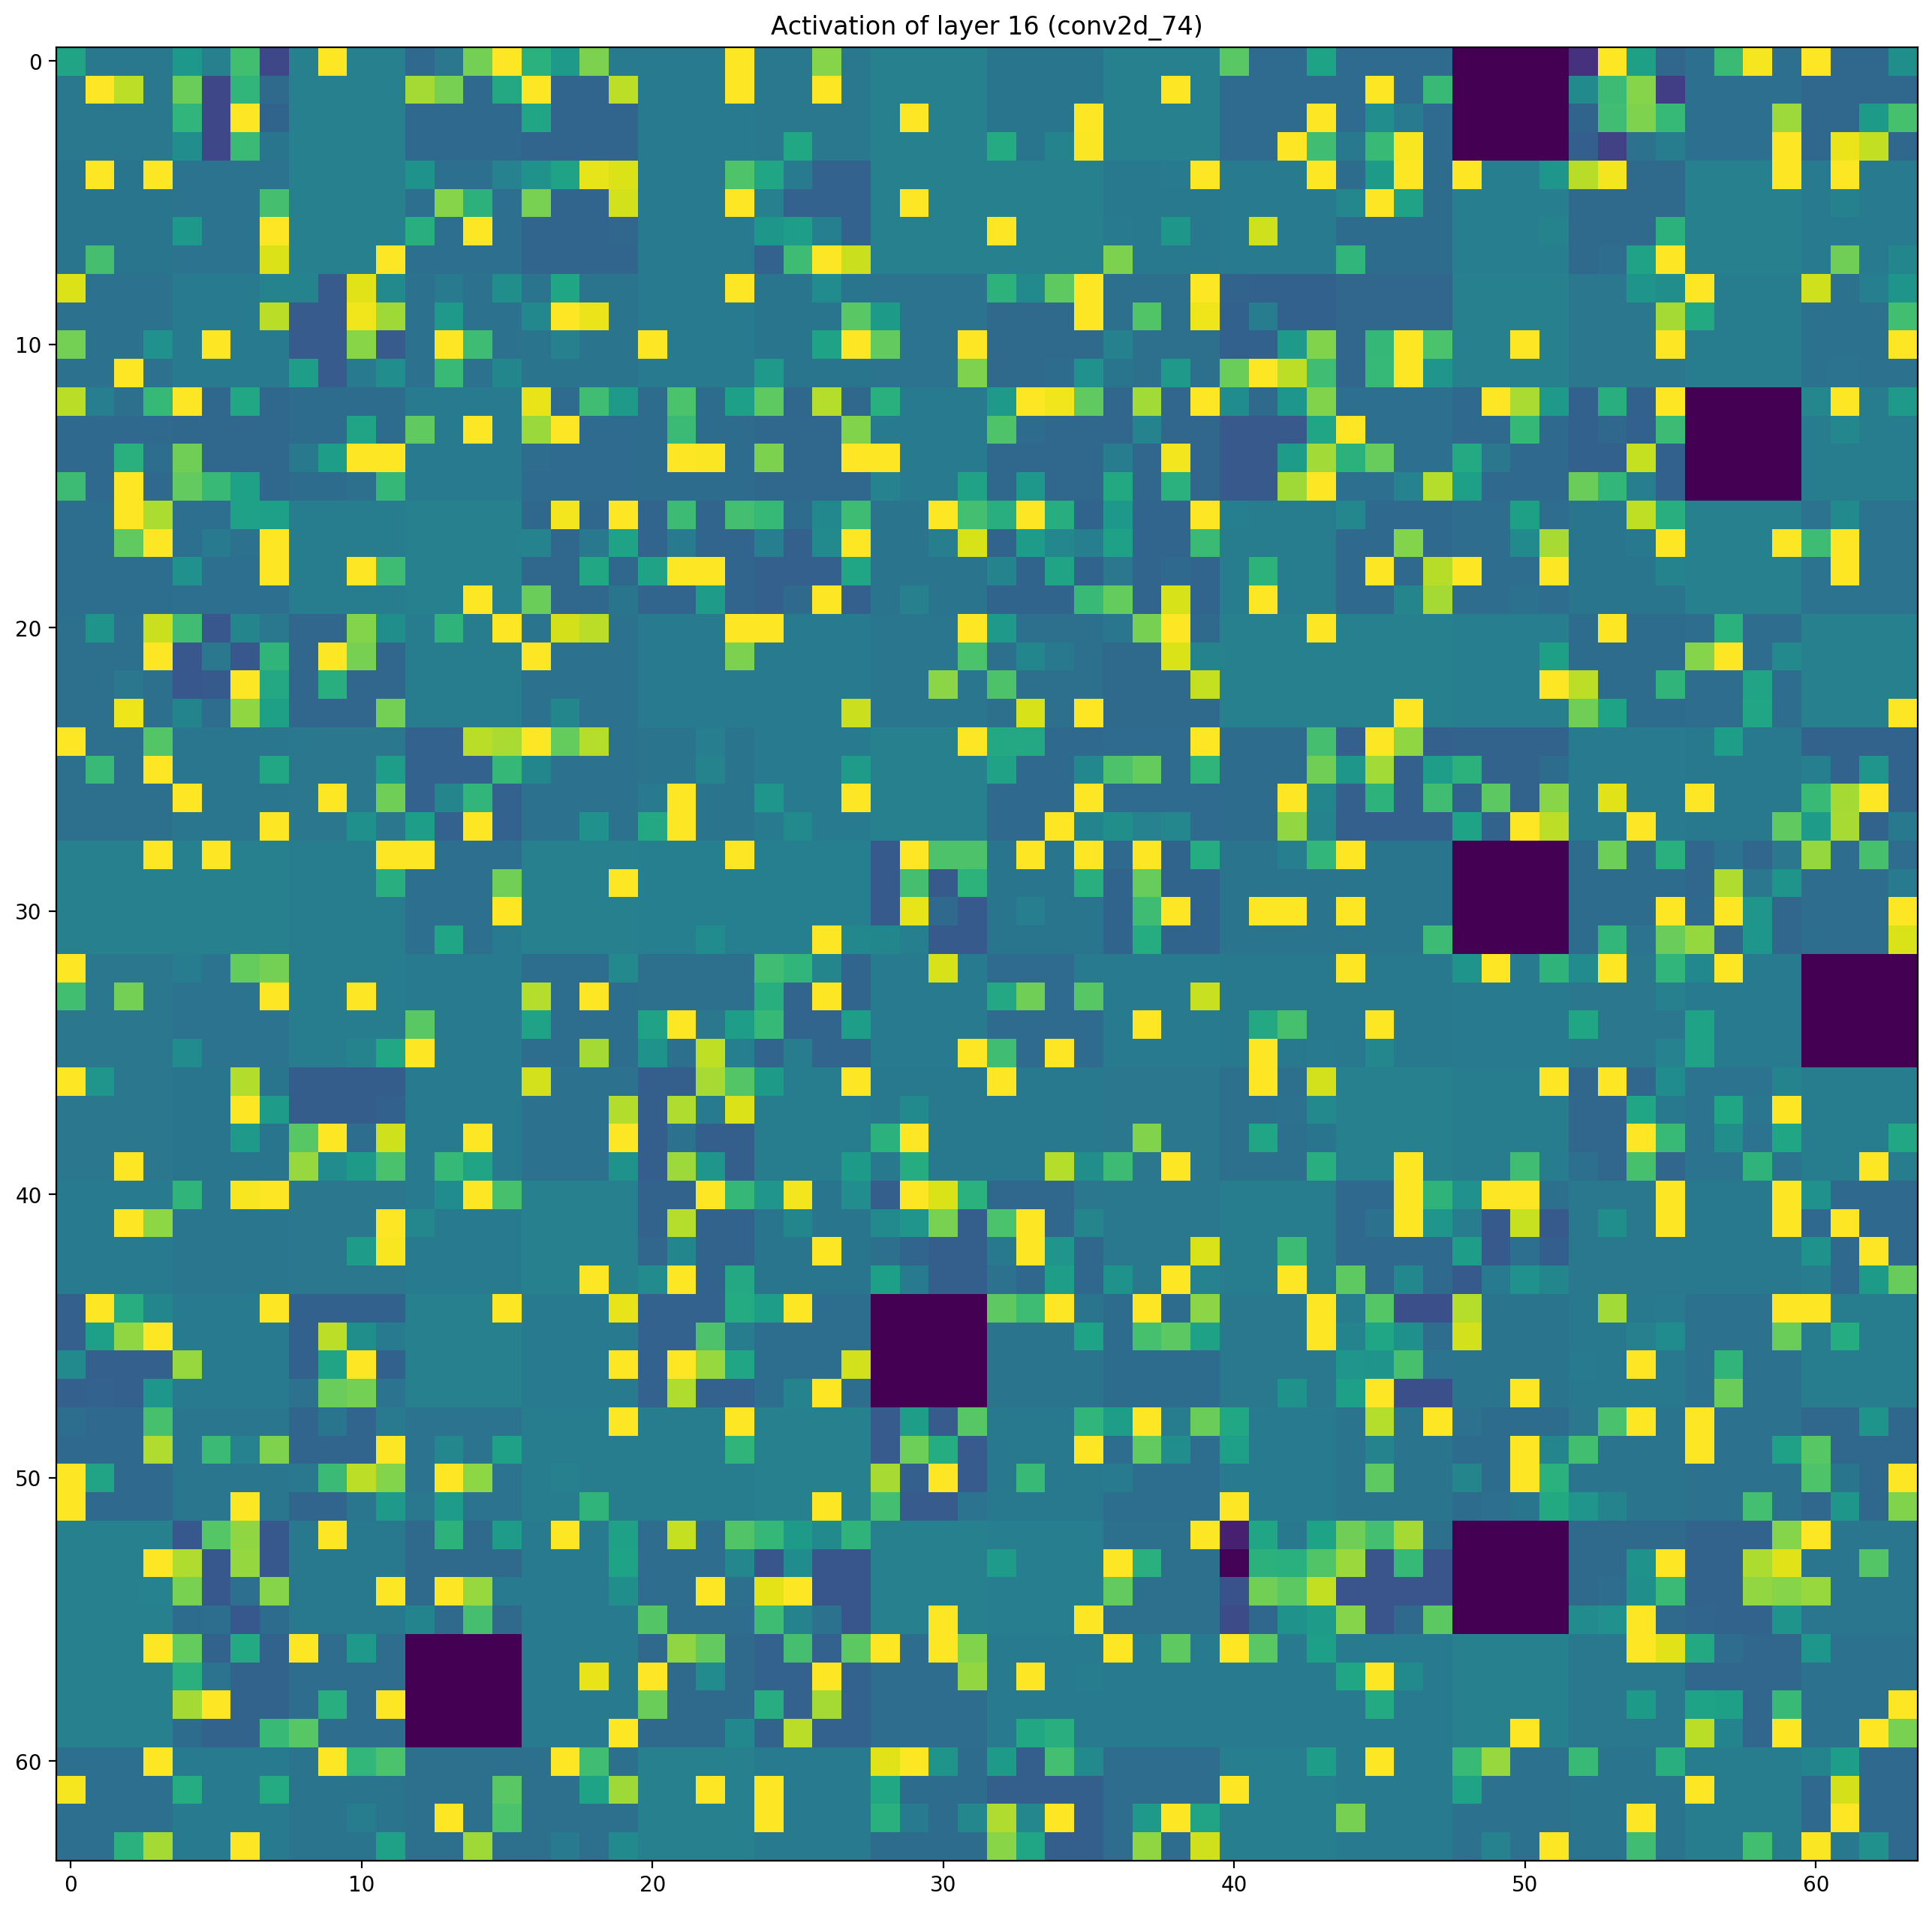

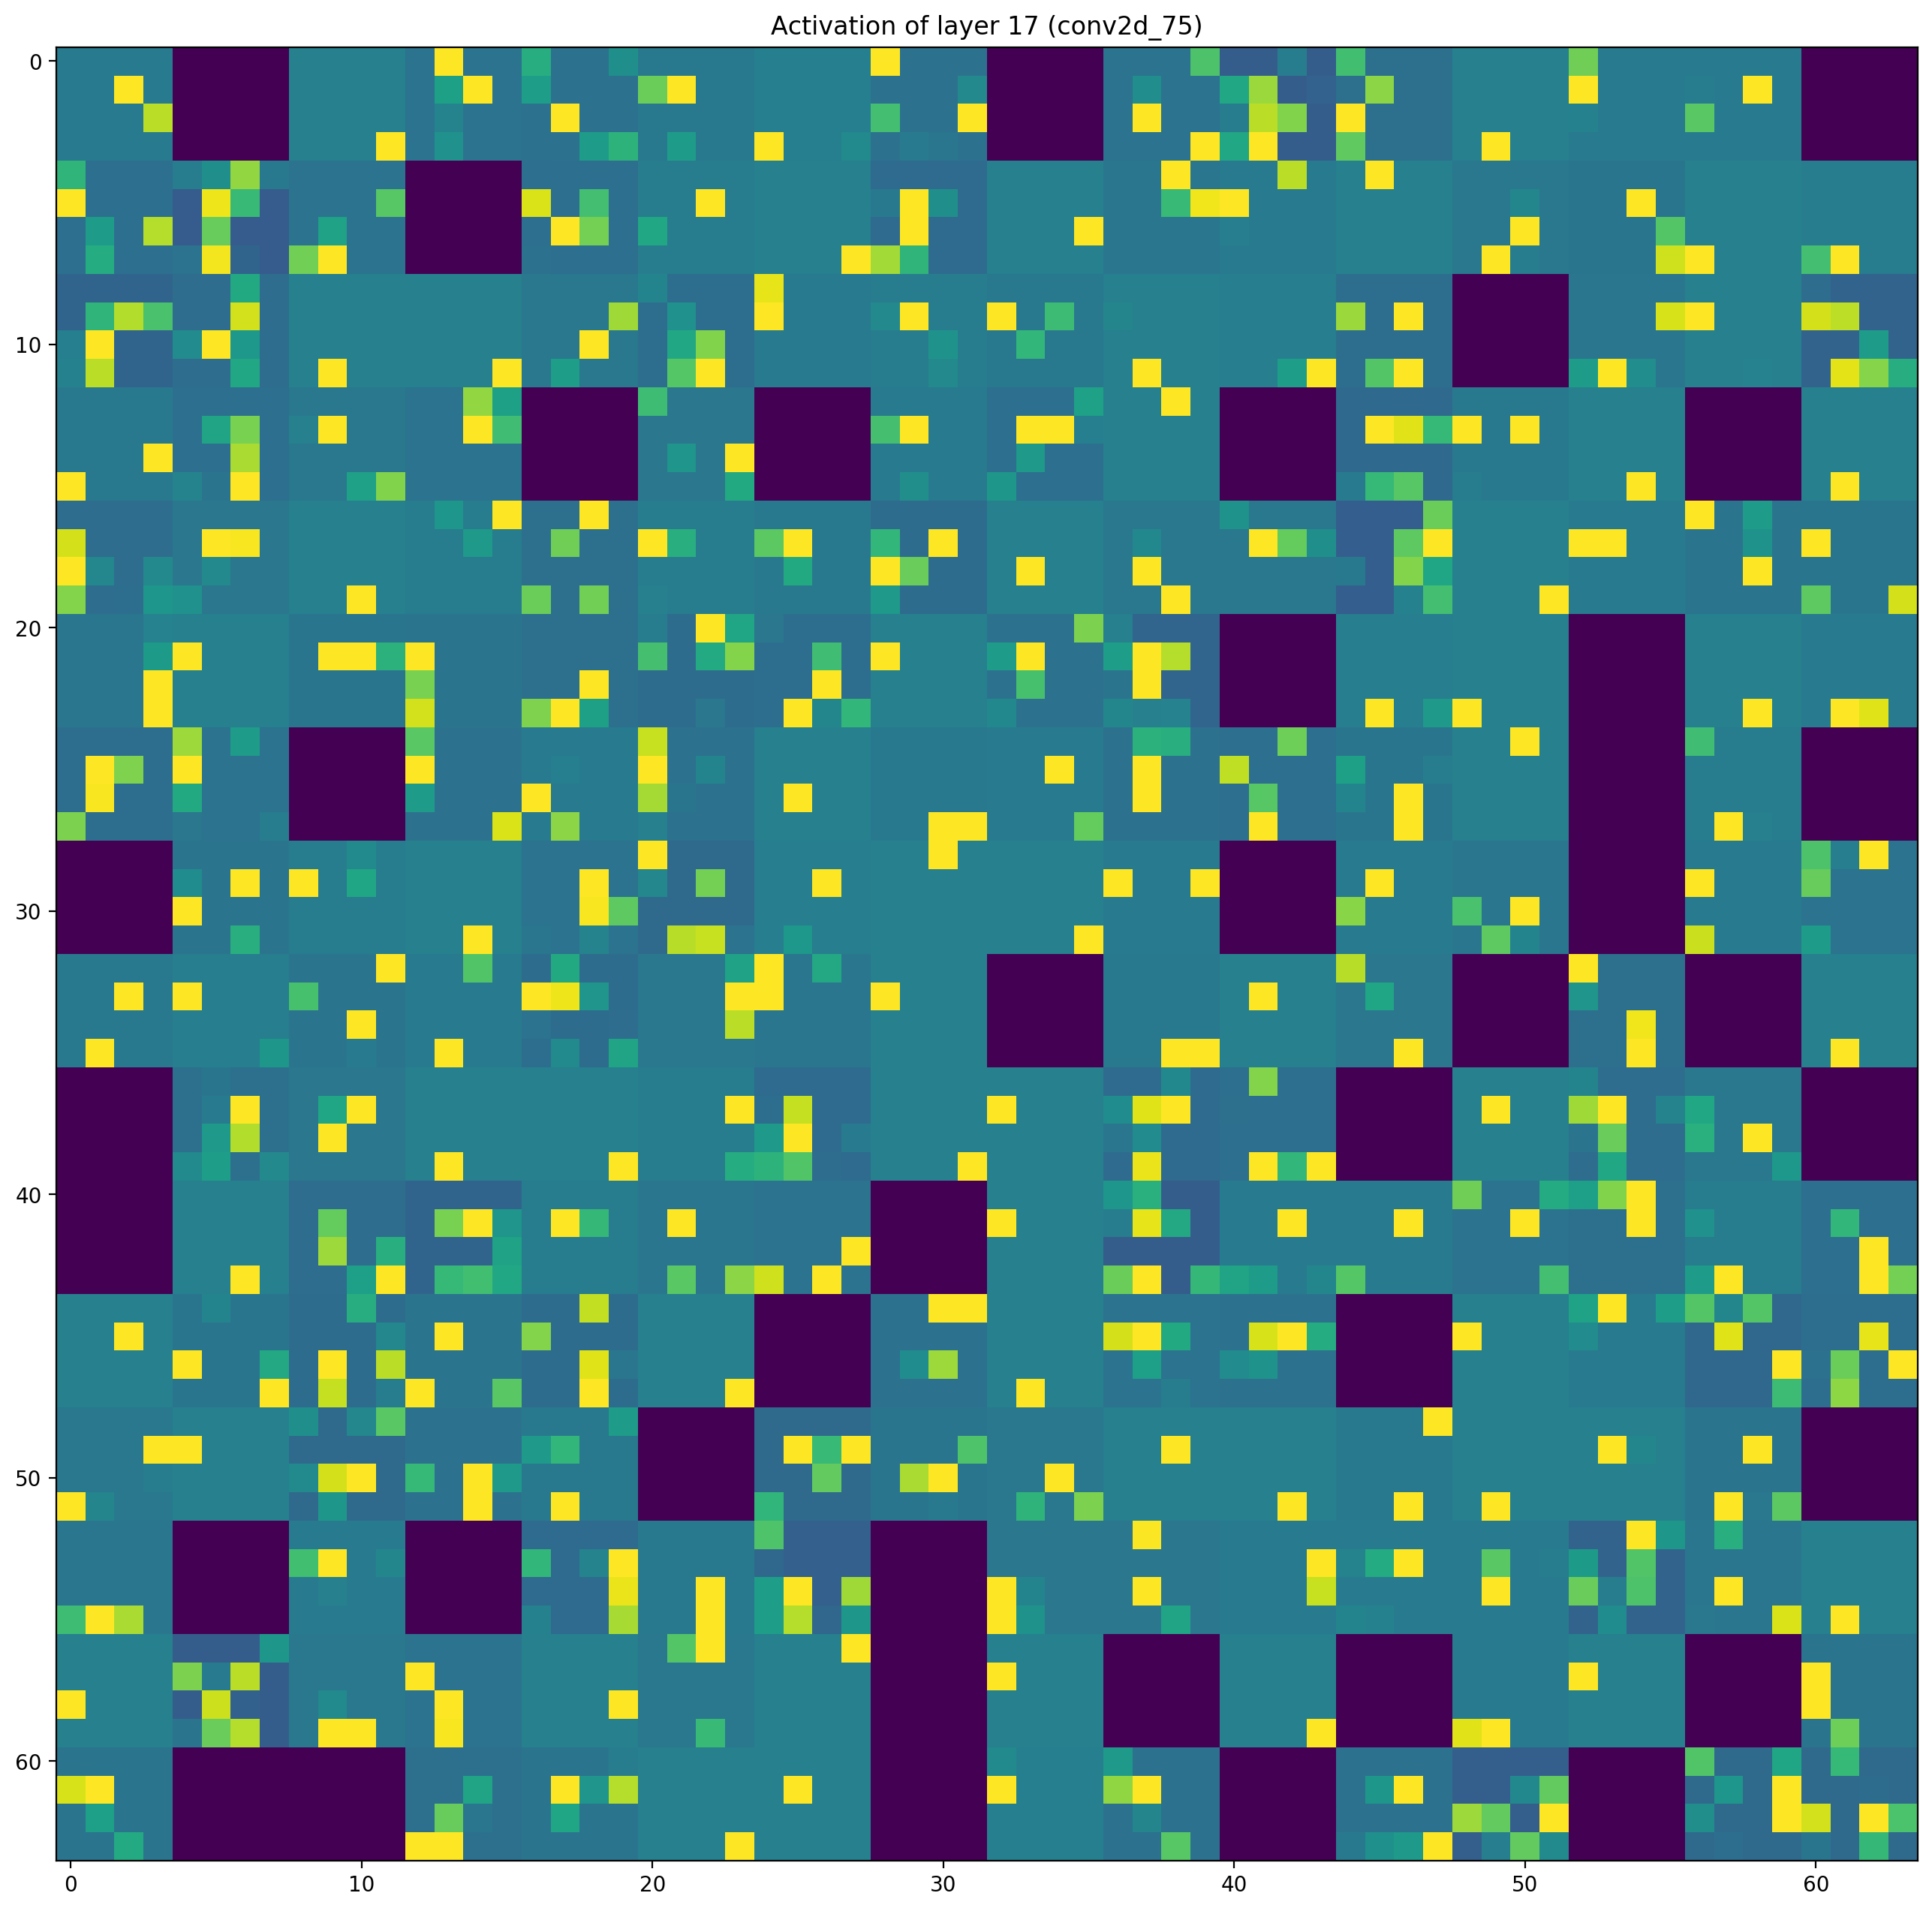

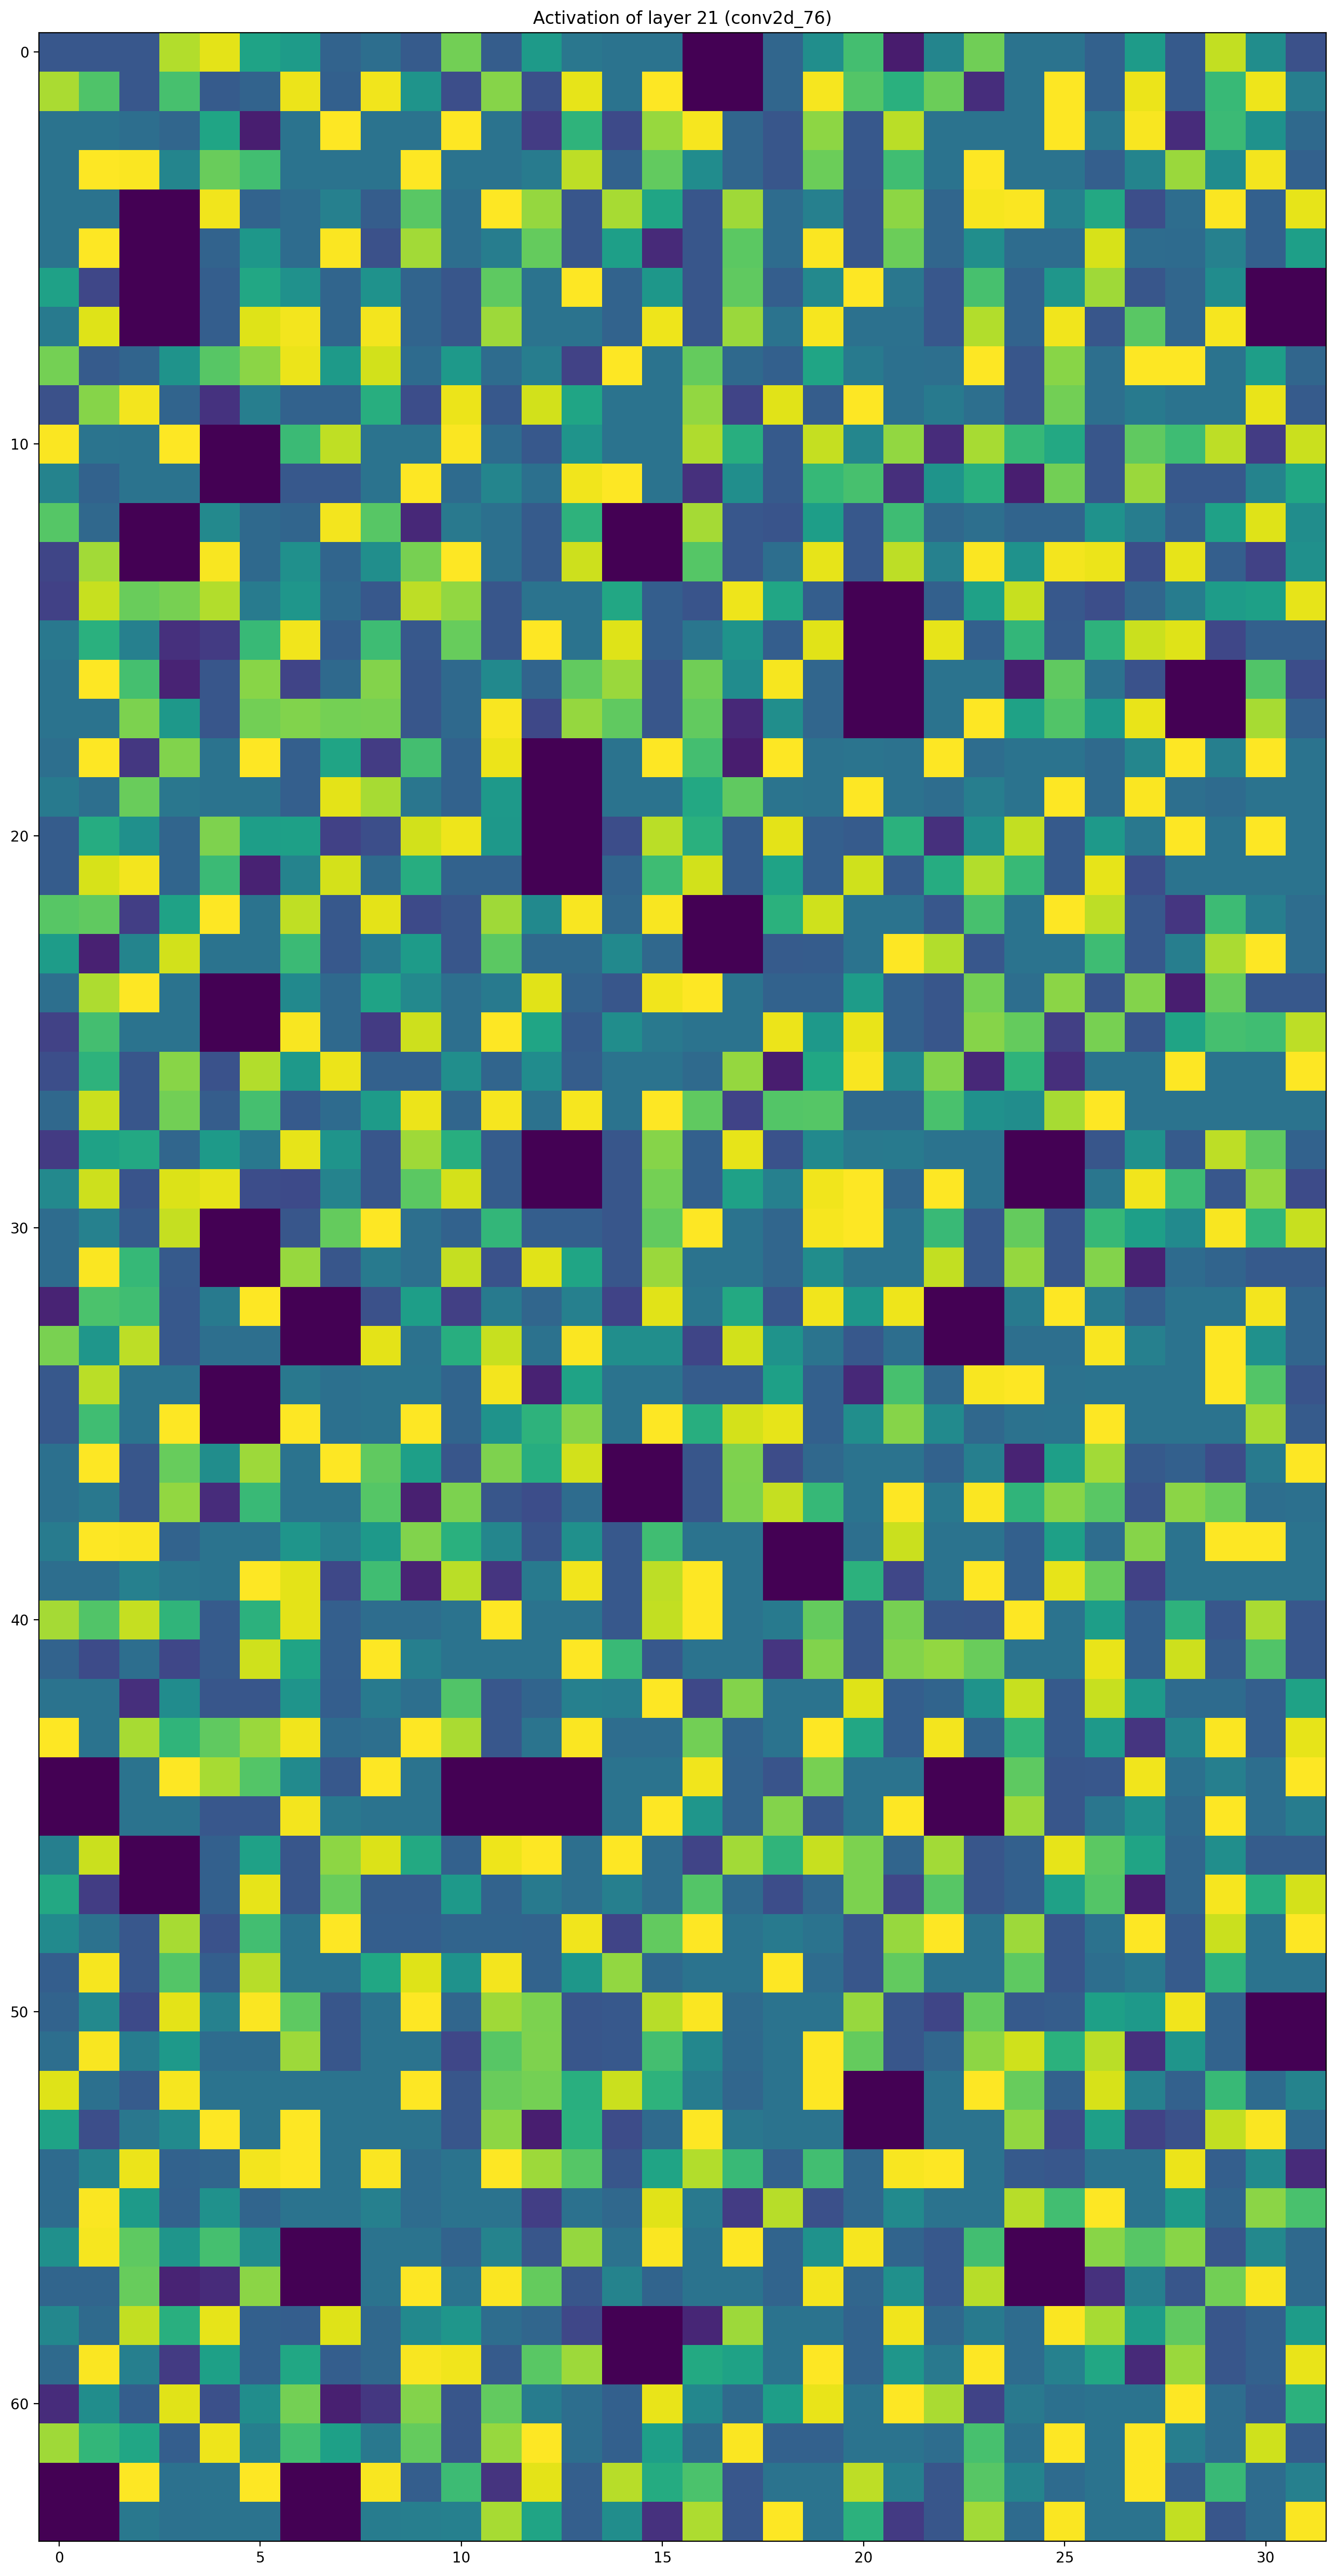

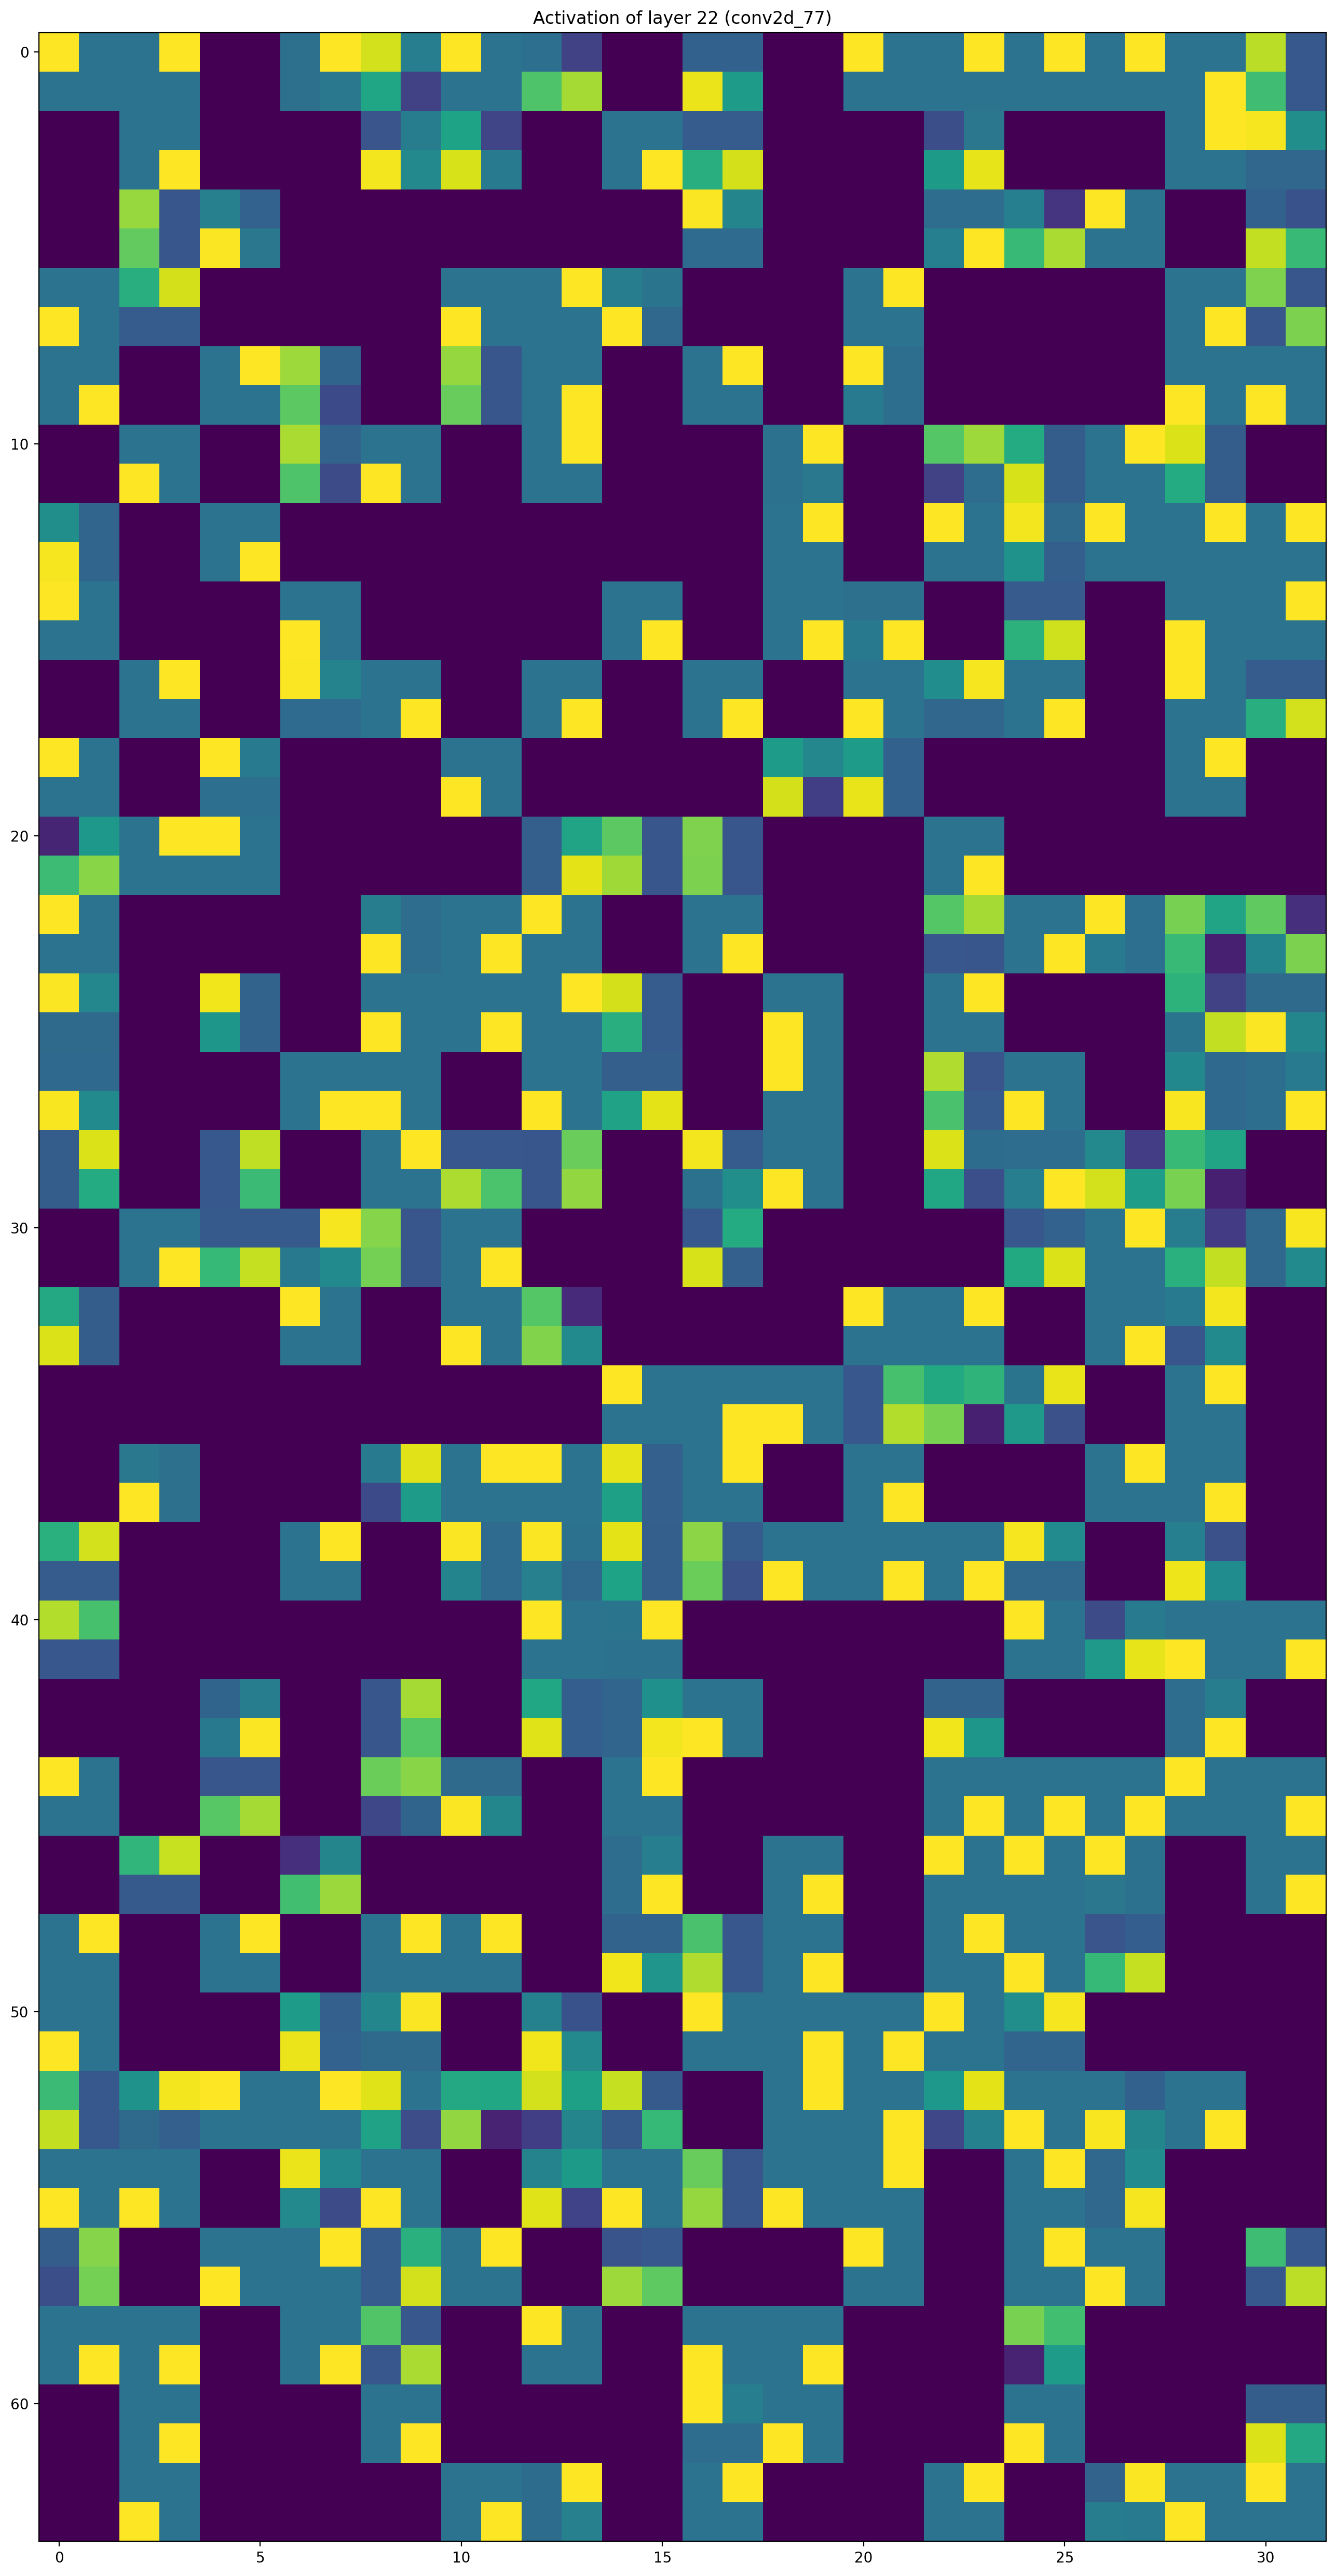

Answer is 476 characters long


In [27]:
def plot(layer_index, activations, layer_names):
    images_per_row = 16
    start = layer_index
    end = layer_index+1
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[:,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

def plot_activations():  
    model = load_model_from_file(base_dir, "model_2_2", extension='.h5')
    model.summary()
    j = 0

    layer_outputs = [layer.output for layer in model.layers[:]] 

    img_tensor = X_test_t[j]
    img_tensor = np.expand_dims(img_tensor, axis=0) 

    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
    activations = activation_model.predict(img_tensor)

    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name)

    for i in range(0, len(layer_names)):
        if "conv2d" in layer_names[i]: 
            plot(i, activations, layer_names)

plot_activations()

answer_q_3_2 = """
Only the first few activation layers are somewhat interesting. Later, these are of very low resolution and resemble white noise.
I find the second and sixth activation (row 1) of layer 1 interesting because it appears to highlight depth. The second cnn layer has
activations with some sharpening effect (e.g. first activation, second row). The third layer is the last one where the majority
resembles an 8. The final layers appear only sensible to a computer.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_34 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 64)       

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


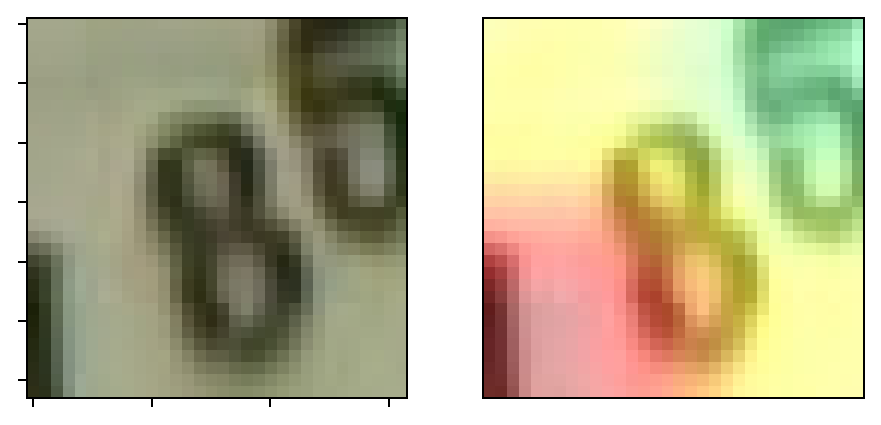

In [36]:
def plot_3_3():  
    K.clear_session()
    tf.compat.v1.disable_eager_execution()
    model = load_model_from_file(base_dir, "model_2_2", extension='.h5') 
    model._make_predict_function()
    model.summary()   

    
    labels = {1: 0, 2: 1,3: 2, 4: 3,5: 4, 6: 5, 7: 6, 8:7, 9: 8, 0: 9}
    z = 0

    img = X_test_t[z]

    eight_output = model.output[:, labels[8]]

    last_conv_layer = model.get_layer('conv2d_77')

    grads = K.gradients(eight_output, last_conv_layer.output)[0]

    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([np.expand_dims(img, axis=0)])  
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (32, 32))
    # We convert the heatmap to RGB
    heatmap = np.uint8(255 * heatmap)

    # We apply the heatmap to the original image
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    X_copy = X_test_t[z].copy() * 255

    # 0.4 here is a heatmap intensity factor
    superimposed_img = heatmap * 0.5 + X_copy

    cv2.imwrite(base_dir +'/test.jpg', superimposed_img)
    img = cv2.imread(base_dir +'/test.jpg')

    RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
    plt.rcParams['figure.dpi'] = 180
  
    plt.subplot(1,2,1).imshow(X_test[z])
    plt.subplot(1,2,2).imshow(RGB_im)

    for i in range(1, 3):
        plt.subplot(1, 2, i).set_xticklabels([])
        plt.subplot(1, 2, i).set_yticklabels([])
    
    plt.xticks([])
    plt.yticks([])
  
    plt.show()
    pass

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [ ]:
def build_model_4_1():
    base_model = VGG16(weights='imagenet', input_shape=(32, 32, 3), include_top=False) # excludes dense part
    model = models.Sequential()
    model.add(base_model)

    #now adding custom layers to VGG16:
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    trainable_layers = ['block5_conv3', 'block5_conv2', 'block5_conv1']

    #Freezing base layers
    for layer in base_model.layers:
        if layer.name not in trainable_layers:
            layer.trainable = False  

    model.summary()

    model.compile(optimizer='RMSprop', loss='categorical_crossentropy',
          metrics=['accuracy'])
    return model

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=20, batch_size=64)
answer_q_4_1 = """
I observed an accuracy of around 55% when the model is frozen. This is because the VGG16 model trained for more and different labels than the digits.
It is still valuable to some extend as the model still learned patterns of shapes that may still apply to digits. Unfreezing some layers allows the model to cater more to our problem.
I did not want to unfreeze many layers so just arbitrarily chose 3 layers, which indeed improves the validation accuracy to 81% with some overfitting at 12 epochs.
"""

print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [ ]:
def PCA_transformation(X, preserve_variance):   
    scaler = StandardScaler()
    X_transformed = scaler.fit_transform(X)
    
    pca_init = PCA(n_components=(512))
    
    pca_init.fit(X_transformed)
    S = pca_init.singular_values_
    
    r=0
    S_cum = np.cumsum(S)
    S_cum_norm = S_cum / S_cum[-1]
    for i in range(0, len(S_cum)):
        if S_cum_norm[i] >= preserve_variance: 
            print("cut-off first r =", i+1, " elements")
            r = i+1
            break
    plt.plot(S_cum_norm, linestyle=':', color='gray')
    plt.axhline(y=preserve_variance, color='red', linestyle='--', linewidth=0.8)
    plt.plot(S_cum_norm[0:r], color='black')
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.xlabel("number of components"),  plt.ylabel("preserved information")
    plt.title(str("PCA analysis (r=" + str(r) + ")"))
    return r


def heatmap(columns, rows, scores):
    """ Simple heatmap.
    Keyword arguments:
    columns -- list of options in the columns
    rows -- list of options in the rows
    scores -- numpy array of scores
    """
    df = pd.DataFrame(scores, index=rows, columns=columns)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")

def store_embedding(X, name):  
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
        pickle.dump(X, file_pi)

def load_embedding(name):
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
        return pickle.load(file_pi)

def store_embeddings():
    """ Stores all necessary embeddings to file
    """
  #first load the model
    model = load_model_from_file(base_dir, "model_4_1", extension='.h5')
    #get the appropriate layer
    model_layer = model.get_layer("vgg16")
    #create embeddings
    to_embed_train = model_layer.predict(X_train)
    to_embed_test = model_layer.predict(X_test)
    to_embed_val = model_layer.predict(X_val)
    #store embeddings
    store_embedding(to_embed_train, "X_train")
    store_embedding(to_embed_test, "X_test")
    store_embedding(to_embed_val, "X_val")
    pass

def generate_pipeline(): #for CV it has input (pca, cv) which is excluded for handing it in.
    """ Returns an sklearn pipeline.
    """
    def pipeline(clf, scaler):
        return Pipeline([(scaler[0], scaler[1]), (clf[0], clf[1])])

    cv = False

    #if cross validation:
    if cv:
        classifiers = {"Logistic regression": LogisticRegression(random_state=1, solver='newton-cg'), "Support Vector Machine": SVC(kernel='rbf', random_state=1), "Random Forest Classifier": RandomForestClassifier(random_state=1)}
        scalers = {"None": None }#,"Standard": StandardScaler(), "Normalizer": Normalizer(), "Min Max": MinMaxScaler()}
        score = np.zeros(3)
        kfold = KFold(n_splits=3, random_state=1, shuffle=True)  

        X_val_pl = load_embedding("X_val") 
        X_val_morphed = pca.transform(np.array([np.asarray(X_val_pl[i, :, :, :]).reshape(-1) for i in range(X_val_pl.shape[0])]))
        y_val_morphed = np.argmax(y_val, axis=1) 

        j = 0
        for i in classifiers:
            scores = cross_val_score(pipeline((i, classifiers[i]), ("Standard", None)), X_val_morphed, y_val_morphed, cv=kfold, n_jobs=-1, scoring='accuracy').mean()
            score[j] = scores
            j+=1

        heatmap( ["none"],["log reg", "svc", "rfc"], score)
        index = np.argmax(score)
        return pipeline(("clf", classifiers.items()[index]), ("None", None))  

    chosen_pipeline = pipeline(("SVC", SVC(kernel='rbf', random_state=1)), ("None", None))
    return chosen_pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    #first fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    #get accuracy score
    accuracy = pipeline.score(X_test, y_test)  
    return accuracy

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """
    #start with loading the embeddings
    X_train_pl = load_embedding("X_train")
    X_test_pl = load_embedding("X_test")
    #create compatible input shapes
    X_train_morphed = np.array([np.asarray(X_train_pl[i, :, :, :]).reshape(-1) for i in range(X_train_pl.shape[0])])
    y_train_morphed = np.argmax(y_train, axis=1) 
    X_test_morphed = np.array([np.asarray(X_test_pl[i, :, :, :]).reshape(-1) for i in range(X_test_pl.shape[0])])
    y_test_morphed = np.argmax(y_test, axis=1)
    #PCA transformation with 95% information variabiliy preserved
    r = PCA_transformation(X_train_morphed, 0.95)
    pca = PCA(r)
    X_train_pca = np.array(pca.fit_transform(X_train_morphed))
    X_test_pca = np.array(pca.transform(X_test_morphed))
    #generate the pipeline
    pipeline = generate_pipeline() #(pca, False) input with CV
    #evaluate the pipeline
    accuracy_score = evaluate_pipeline(pipeline, X_train_pca, y_train_morphed, X_test_pca, y_test_morphed)
    print(accuracy_score)
    return accuracy_score

answer_q_4_2 = """
In terms of preprocessing I applied PCA to maintain 95% of the information, while significantly reducing dimensions. I also applied cross validation
to choose an appropriate pipeline. Some experimentation showed that scalers in general have a negative effect on the accuracy. The analyses showed that the SVC classifier
gives the highest accuracy of 81.8%. This amount could be higher which happens when more than 3 layers of model 4.1 are unfrozen.
"""
print("Pipeline:",generate_pipeline())

# store_embeddings()
evaluation_4_2(X_train, y_train, X_test, y_test)

print("Answer is {} characters long".format(len(answer_q_4_2)))